In [1]:
!nvidia-smi
!pip install xgboost==2.0.3 optuna imbalanced-learn shap joblib openpyxl --quiet

Sun Dec  7 17:14:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install -U imbalanced-learn
!pip install --upgrade pip setuptools wheel
!pip install --upgrade scikit-learn imbalanced-learn optuna joblib matplotlib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 120.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 137.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 136.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 110.7 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [

In [2]:
!pip install numpy==1.26.4 --force-reinstall
!pip install shap --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 120.0 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 164.1 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import(
precision_recall_curve , recall_score , f1_score , balanced_accuracy_score ,
roc_auc_score , confusion_matrix , precision_score , classification_report ,
matthews_corrcoef , cohen_kappa_score
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import geometric_mean_score , classification_report_imbalanced
import joblib
import optuna
from optuna.samplers import TPESampler

# ==============================================================================
# CONFIGURATION
# ==============================================================================
MODE = "realistic"       # "realistic" drops CA/PA, "full" keeps them
SEED = 67
TEST_SIZE = 0.15
VAL_SIZE = 0.15
FILE_PATH = "/content/final_dataset_p90_success.xlsx"
N_TRIALS = 100


# ==============================================================================
# Load and transform data
# ==============================================================================
print("Reading file...")
df = pd.read_excel(FILE_PATH)
print(f"Dataset: {df.shape[0]:,} rows, {df.shape[1]} cols")
print(f"Success rate: {df['success_label'].mean()*100:.2f}%")


# drop irrelevant/leak columns
drop_cols = [
    'UID', 'Name', 'Club', 'Source_File',
    'UID_k1', 'UID_k2', 'UID_k3',
    'Transfer Value_k1', 'Transfer Value_k2', 'Transfer Value_k3',
    'success_k1', 'success_k2', 'success_k3',
    'Transfer Value',
    'Position', 'Nat', "Age"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# drop CA/PA if realistic
if MODE == "realistic":
    df = df.drop(columns=[c for c in ["CA", "PA"] if c in df.columns], errors='ignore')
    print("MODE=realistic -> Dropped CA and PA")
else:
    print("MODE=full -> Keeping CA and PA")

# feature engineering (if full mode)
if all(col in df.columns for col in ["PA", "CA"]):
    df["Growth_Ratio"] = df["PA"] / df["CA"].replace(0, 1)
    df["Growth_Room"] = df["PA"] - df["CA"]

X = df.drop(columns=["success_label"])
y = df["success_label"]
print(f"\nFeatures: {X.shape[1]}  |  Samples: {X.shape[0]:,}")
print(f"Success distribution: {y.value_counts().to_dict()}")

# Split Train / Temp (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=VAL_SIZE + TEST_SIZE, stratify=y, random_state=SEED)
# Split Validation / Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=SEED)


# ==============================================================================
# OPTUNA OBJECTIVE FUNCTION
# ==============================================================================
def objective(trial):
    # SMOTE parameters
    smote_level = trial.suggest_categorical("smote_level", ["small", "medium", "high"])
    smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[smote_level]
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=SEED)

    # XGBoost parameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "tree_method": "gpu_hist",  # Use GPU in Colab
        "random_state": SEED,
        "eval_metric": "logloss"
    }

    clf = XGBClassifier(**params, use_label_encoder=False)

    pipe = ImbPipeline([
        ("smote", smote),
        ("clf", clf)
    ])

    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    return balanced_accuracy_score(y_val, y_val_pred)

# ==============================================================================
# RUN OPTUNA STUDY
# ==============================================================================
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=SEED), study_name="XGBoost_Realistic")
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)

best_params = study.best_params
print("\nBest Hyperparameters:", best_params)

# ==============================================================================
# FINAL MODEL TRAINING
# ==============================================================================
best_params_xgb = study.best_params
smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[best_params_xgb['smote_level']]
best_smote_xgb= SMOTE(sampling_strategy=smote_ratio, random_state=SEED)


xgb_clf = XGBClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    colsample_bytree=best_params["colsample_bytree"],
    gamma=best_params["gamma"],
    reg_lambda=best_params["reg_lambda"],
    reg_alpha=best_params["reg_alpha"],
    tree_method="gpu_hist",  # GPU acceleration
    random_state=SEED,
    use_label_encoder=False,
    eval_metric="logloss"
)

final_pipe_xgb = ImbPipeline([
    ("smote", best_smote_xgb),
    ("clf", xgb_clf)
])

final_pipe_xgb.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Reading file...


[I 2025-12-07 17:16:17,216] A new study created in memory with name: XGBoost_Realistic


Dataset: 43,903 rows, 82 cols
Success rate: 3.29%
MODE=realistic -> Dropped CA and PA

Features: 62  |  Samples: 43,903
Success distribution: {0: 42460, 1: 1443}


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


[I 2025-12-07 17:16:19,172] Trial 0 finished with value: 0.7275006105964655 and parameters: {'smote_level': 'medium', 'n_estimators': 232, 'max_depth': 3, 'learning_rate': 0.0372030992310257, 'subsample': 0.6852599434737423, 'colsample_bytree': 0.9730026600325441, 'gamma': 3.6140914942793105, 'reg_lambda': 0.124105381329643, 'reg_alpha': 4.106554246922489}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:20,829] Trial 1 finished with value: 0.6521431935939708 and parameters: {'smote_level': 'small', 'n_estimators': 175, 'max_depth': 5, 'learning_rate': 0.02398715961802208, 'subsample': 0.6044456461293007, 'colsample_bytree': 0.7638354039473789, 'gamma': 2.061272257629838, 'reg_lambda': 0.12200497542695123, 'reg_alpha': 4.775043967143612}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:22,977] Trial 2 finished with value: 0.6604200467542436 and parameters: {'smote_level': 'medium', 'n_estimators': 223, 'max_depth': 7, 'learning_rate': 0.11130236949854995, 'subsample': 0.9813698212790307, 'colsample_bytree': 0.8407699229007761, 'gamma': 2.011257849732101, 'reg_lambda': 0.5126965547823584, 'reg_alpha': 4.070817451529237}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:25,003] Trial 3 finished with value: 0.6522195181521606 and parameters: {'smote_level': 'high', 'n_estimators': 173, 'max_depth': 8, 'learning_rate': 0.12108336578262786, 'subsample': 0.6184559914235704, 'colsample_bytree': 0.9878345575091758, 'gamma': 1.8527177160030517, 'reg_lambda': 2.593513273531763, 'reg_alpha': 1.369653507991646}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:27,261] Trial 4 finished with value: 0.6594376406552572 and parameters: {'smote_level': 'medium', 'n_estimators': 491, 'max_depth': 3, 'learning_rate': 0.20952859869129206, 'subsample': 0.7416816720920439, 'colsample_bytree': 0.9708141342722716, 'gamma': 2.002438338561486, 'reg_lambda': 0.8647735161772228, 'reg_alpha': 2.2372360543881724}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:29,922] Trial 5 finished with value: 0.6482201113030128 and parameters: {'smote_level': 'small', 'n_estimators': 371, 'max_depth': 6, 'learning_rate': 0.021500171213086904, 'subsample': 0.6607342165872642, 'colsample_bytree': 0.7814207517983819, 'gamma': 4.109489402713902, 'reg_lambda': 1.8875378029848822, 'reg_alpha': 4.985826798679207}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:32,386] Trial 6 finished with value: 0.610164686589557 and parameters: {'smote_level': 'small', 'n_estimators': 376, 'max_depth': 5, 'learning_rate': 0.13720466600024972, 'subsample': 0.6750707006976931, 'colsample_bytree': 0.785602332749154, 'gamma': 0.06206772379572234, 'reg_lambda': 0.20563069135604445, 'reg_alpha': 0.8424929655394603}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:34,769] Trial 7 finished with value: 0.6544176654280282 and parameters: {'smote_level': 'medium', 'n_estimators': 243, 'max_depth': 9, 'learning_rate': 0.14908924043977712, 'subsample': 0.6588957406814445, 'colsample_bytree': 0.6952278886083997, 'gamma': 2.3284030773147784, 'reg_lambda': 7.933761202724934, 'reg_alpha': 2.634537739131204}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:36,434] Trial 8 finished with value: 0.6396292371033303 and parameters: {'smote_level': 'small', 'n_estimators': 108, 'max_depth': 8, 'learning_rate': 0.022055410388994137, 'subsample': 0.9175466294277452, 'colsample_bytree': 0.7322446953048619, 'gamma': 0.13480886279005622, 'reg_lambda': 8.513656174066792, 'reg_alpha': 4.739645974595556}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:38,395] Trial 9 finished with value: 0.6412375045794735 and parameters: {'smote_level': 'small', 'n_estimators': 422, 'max_depth': 6, 'learning_rate': 0.11238031518425252, 'subsample': 0.7157759383328506, 'colsample_bytree': 0.6384542062025221, 'gamma': 3.3358902069016265, 'reg_lambda': 6.775262630486915, 'reg_alpha': 0.5728747228781511}. Best is trial 0 with value: 0.7275006105964655.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:40,362] Trial 10 finished with value: 0.801902880270756 and parameters: {'smote_level': 'high', 'n_estimators': 305, 'max_depth': 3, 'learning_rate': 0.010609701321034655, 'subsample': 0.8278331261396423, 'colsample_bytree': 0.8867949149635789, 'gamma': 4.7541639252868, 'reg_lambda': 0.2869426729039935, 'reg_alpha': 3.278653693654581}. Best is trial 10 with value: 0.801902880270756.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:42,493] Trial 11 finished with value: 0.806572852881143 and parameters: {'smote_level': 'high', 'n_estimators': 293, 'max_depth': 3, 'learning_rate': 0.01162677499306044, 'subsample': 0.8528284447230342, 'colsample_bytree': 0.891459679846103, 'gamma': 4.794423884250189, 'reg_lambda': 0.26880407843264764, 'reg_alpha': 3.420271901523221}. Best is trial 11 with value: 0.806572852881143.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:45,090] Trial 12 finished with value: 0.8066960625250781 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.010545830746577164, 'subsample': 0.8444982941613374, 'colsample_bytree': 0.8808917331804552, 'gamma': 4.925601505244534, 'reg_lambda': 0.3287021496983881, 'reg_alpha': 2.9848054368967127}. Best is trial 12 with value: 0.8066960625250781.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:47,758] Trial 13 finished with value: 0.8083828352610736 and parameters: {'smote_level': 'high', 'n_estimators': 303, 'max_depth': 4, 'learning_rate': 0.01057875242841594, 'subsample': 0.8343226603043971, 'colsample_bytree': 0.887196342793939, 'gamma': 4.923374840914375, 'reg_lambda': 0.42238701765068354, 'reg_alpha': 2.969671836662886}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:50,289] Trial 14 finished with value: 0.7767310409797457 and parameters: {'smote_level': 'high', 'n_estimators': 318, 'max_depth': 5, 'learning_rate': 0.014433207999348323, 'subsample': 0.7759291587868797, 'colsample_bytree': 0.9118328331322464, 'gamma': 4.970812573868994, 'reg_lambda': 0.6118612623255228, 'reg_alpha': 2.0906497032924545}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:52,738] Trial 15 finished with value: 0.7179273302977967 and parameters: {'smote_level': 'high', 'n_estimators': 364, 'max_depth': 4, 'learning_rate': 0.06164655625674846, 'subsample': 0.8923450987850311, 'colsample_bytree': 0.8463057031795832, 'gamma': 4.105106862866182, 'reg_lambda': 1.5203850571750337, 'reg_alpha': 2.9231920356799326}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:16:55,901] Trial 16 finished with value: 0.7119249489715811 and parameters: {'smote_level': 'high', 'n_estimators': 452, 'max_depth': 4, 'learning_rate': 0.04865472856982077, 'subsample': 0.7854517489198916, 'colsample_bytree': 0.9272418318223585, 'gamma': 3.003580305847441, 'reg_lambda': 0.40624446643373513, 'reg_alpha': 1.4043671906429436}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:16:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:01,265] Trial 17 finished with value: 0.7085535842012526 and parameters: {'smote_level': 'high', 'n_estimators': 273, 'max_depth': 10, 'learning_rate': 0.013847768675048668, 'subsample': 0.8894888090007106, 'colsample_bytree': 0.8407036465383123, 'gamma': 4.1679927873444065, 'reg_lambda': 0.8272992853539539, 'reg_alpha': 3.8404465962996475}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:03,559] Trial 18 finished with value: 0.7529188691753459 and parameters: {'smote_level': 'high', 'n_estimators': 354, 'max_depth': 4, 'learning_rate': 0.03077370082576555, 'subsample': 0.9308596678618336, 'colsample_bytree': 0.9377659982214154, 'gamma': 0.9714865597244597, 'reg_lambda': 0.20734998238147728, 'reg_alpha': 1.8568599021226473}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:07,116] Trial 19 finished with value: 0.7141612585265436 and parameters: {'smote_level': 'high', 'n_estimators': 342, 'max_depth': 7, 'learning_rate': 0.016952629692280844, 'subsample': 0.8288656117212726, 'colsample_bytree': 0.8281728902090193, 'gamma': 2.901352811585645, 'reg_lambda': 0.3861944577004356, 'reg_alpha': 2.899548378114531}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:10,094] Trial 20 finished with value: 0.685326930793252 and parameters: {'smote_level': 'high', 'n_estimators': 409, 'max_depth': 5, 'learning_rate': 0.051460208728998195, 'subsample': 0.986143526466136, 'colsample_bytree': 0.8830689122195808, 'gamma': 4.372213753912025, 'reg_lambda': 3.9004324511730557, 'reg_alpha': 3.4416881257572634}. Best is trial 13 with value: 0.8083828352610736.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:12,237] Trial 21 finished with value: 0.8101862755360165 and parameters: {'smote_level': 'high', 'n_estimators': 270, 'max_depth': 4, 'learning_rate': 0.010385468253197187, 'subsample': 0.8309820905907669, 'colsample_bytree': 0.8804092446542483, 'gamma': 4.669586875319898, 'reg_lambda': 0.2317122828025197, 'reg_alpha': 3.505139096393703}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:14,894] Trial 22 finished with value: 0.8081069765007589 and parameters: {'smote_level': 'high', 'n_estimators': 275, 'max_depth': 4, 'learning_rate': 0.010151673752835665, 'subsample': 0.8509673271280216, 'colsample_bytree': 0.8707290065597301, 'gamma': 3.7104492281632426, 'reg_lambda': 0.10078198488177989, 'reg_alpha': 2.7143352646208703}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:16,787] Trial 23 finished with value: 0.7924593517210097 and parameters: {'smote_level': 'high', 'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.018924871873105324, 'subsample': 0.8011097415099223, 'colsample_bytree': 0.81597652493235, 'gamma': 3.637580795601782, 'reg_lambda': 0.10151981993817721, 'reg_alpha': 2.5059712738504727}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:19,343] Trial 24 finished with value: 0.7824575635456466 and parameters: {'smote_level': 'high', 'n_estimators': 194, 'max_depth': 6, 'learning_rate': 0.014549950910491235, 'subsample': 0.8767375410246278, 'colsample_bytree': 0.9465960005458335, 'gamma': 4.483856741247951, 'reg_lambda': 0.16486372592257803, 'reg_alpha': 3.717427383600352}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:21,268] Trial 25 finished with value: 0.7707690026342876 and parameters: {'smote_level': 'high', 'n_estimators': 202, 'max_depth': 5, 'learning_rate': 0.028367135549690045, 'subsample': 0.7668752557756854, 'colsample_bytree': 0.8601732499024463, 'gamma': 3.734100436053111, 'reg_lambda': 0.1725027625766288, 'reg_alpha': 3.1740116671752965}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:23,481] Trial 26 finished with value: 0.8068508923431204 and parameters: {'smote_level': 'high', 'n_estimators': 276, 'max_depth': 4, 'learning_rate': 0.010056229153091251, 'subsample': 0.9349839362714977, 'colsample_bytree': 0.9068638785808648, 'gamma': 4.51519551499283, 'reg_lambda': 0.5290703283259565, 'reg_alpha': 4.45303632245531}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:24,606] Trial 27 finished with value: 0.7826505556427836 and parameters: {'smote_level': 'high', 'n_estimators': 108, 'max_depth': 3, 'learning_rate': 0.07557912106166953, 'subsample': 0.7996810194356966, 'colsample_bytree': 0.866722992311708, 'gamma': 3.9347584779009974, 'reg_lambda': 0.14964465829166984, 'reg_alpha': 1.7813885793561202}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:28,173] Trial 28 finished with value: 0.7096123148584288 and parameters: {'smote_level': 'medium', 'n_estimators': 333, 'max_depth': 5, 'learning_rate': 0.01606522375348092, 'subsample': 0.8645633893492741, 'colsample_bytree': 0.746497445666503, 'gamma': 3.2124817359589994, 'reg_lambda': 0.2163315718295328, 'reg_alpha': 2.6305107435280313}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:30,131] Trial 29 finished with value: 0.7890476439699238 and parameters: {'smote_level': 'high', 'n_estimators': 271, 'max_depth': 3, 'learning_rate': 0.03743363311023284, 'subsample': 0.8200038089094516, 'colsample_bytree': 0.9597599404569693, 'gamma': 2.7329764997156807, 'reg_lambda': 0.10355908875824889, 'reg_alpha': 3.7998521650457784}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:32,816] Trial 30 finished with value: 0.730210132412205 and parameters: {'smote_level': 'medium', 'n_estimators': 223, 'max_depth': 6, 'learning_rate': 0.012391329119561324, 'subsample': 0.7485535575951683, 'colsample_bytree': 0.8073383644937905, 'gamma': 3.3565588557045944, 'reg_lambda': 1.1581963798599686, 'reg_alpha': 4.23240549707598}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:35,229] Trial 31 finished with value: 0.8081854817606113 and parameters: {'smote_level': 'high', 'n_estimators': 287, 'max_depth': 4, 'learning_rate': 0.010396823231355304, 'subsample': 0.9416699762430002, 'colsample_bytree': 0.9121112496600664, 'gamma': 4.5751541761649, 'reg_lambda': 0.6229296415293132, 'reg_alpha': 4.298715315597274}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:37,736] Trial 32 finished with value: 0.7880270755918424 and parameters: {'smote_level': 'high', 'n_estimators': 294, 'max_depth': 4, 'learning_rate': 0.018194222284345855, 'subsample': 0.960214987872182, 'colsample_bytree': 0.9136624021264997, 'gamma': 4.564597905716823, 'reg_lambda': 0.695654848154126, 'reg_alpha': 4.200378221037199}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:40,431] Trial 33 finished with value: 0.7883770782086844 and parameters: {'smote_level': 'high', 'n_estimators': 232, 'max_depth': 5, 'learning_rate': 0.012524516099901885, 'subsample': 0.9071068790281862, 'colsample_bytree': 0.8669662476322033, 'gamma': 3.8442035872846736, 'reg_lambda': 0.4477947747418951, 'reg_alpha': 4.498928754194625}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:41,715] Trial 34 finished with value: 0.7957391270215104 and parameters: {'smote_level': 'high', 'n_estimators': 166, 'max_depth': 3, 'learning_rate': 0.01002967813757308, 'subsample': 0.8672089278396288, 'colsample_bytree': 0.998897453063678, 'gamma': 4.328761828318083, 'reg_lambda': 0.13966469396636091, 'reg_alpha': 3.5797564325717977}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:43,693] Trial 35 finished with value: 0.7842228415414944 and parameters: {'smote_level': 'high', 'n_estimators': 248, 'max_depth': 4, 'learning_rate': 0.024424873881859318, 'subsample': 0.939665536434615, 'colsample_bytree': 0.9328641337061262, 'gamma': 4.697369879719756, 'reg_lambda': 0.25962546327200975, 'reg_alpha': 3.902114975332057}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:45,501] Trial 36 finished with value: 0.640804635299454 and parameters: {'smote_level': 'small', 'n_estimators': 321, 'max_depth': 3, 'learning_rate': 0.2965125729043501, 'subsample': 0.9626992668188837, 'colsample_bytree': 0.9568266317401741, 'gamma': 1.330135133533408, 'reg_lambda': 1.1507666208998042, 'reg_alpha': 2.3204128876325707}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:48,645] Trial 37 finished with value: 0.713770912928944 and parameters: {'smote_level': 'medium', 'n_estimators': 389, 'max_depth': 5, 'learning_rate': 0.013793129913017822, 'subsample': 0.8022962829271042, 'colsample_bytree': 0.9799783856195503, 'gamma': 4.095864015247602, 'reg_lambda': 0.33454069571799266, 'reg_alpha': 3.078621135049653}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:50,946] Trial 38 finished with value: 0.7614715810959334 and parameters: {'smote_level': 'high', 'n_estimators': 147, 'max_depth': 7, 'learning_rate': 0.019659102419141202, 'subsample': 0.847857482476975, 'colsample_bytree': 0.9042433862934637, 'gamma': 4.905252144213724, 'reg_lambda': 0.6017274908807562, 'reg_alpha': 2.8327975371475}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:54,221] Trial 39 finished with value: 0.6499853892988607 and parameters: {'smote_level': 'small', 'n_estimators': 210, 'max_depth': 6, 'learning_rate': 0.02730616479171766, 'subsample': 0.7118379621625914, 'colsample_bytree': 0.7873955212558922, 'gamma': 3.492004479177461, 'reg_lambda': 0.8436971375649128, 'reg_alpha': 4.974596355216863}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:56,169] Trial 40 finished with value: 0.7012166134575462 and parameters: {'smote_level': 'medium', 'n_estimators': 283, 'max_depth': 4, 'learning_rate': 0.0349674624243182, 'subsample': 0.9020188661490343, 'colsample_bytree': 0.6034386527383208, 'gamma': 4.297154439445438, 'reg_lambda': 0.4715453246216887, 'reg_alpha': 0.13575563408397118}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:17:58,225] Trial 41 finished with value: 0.808930191378378 and parameters: {'smote_level': 'high', 'n_estimators': 263, 'max_depth': 4, 'learning_rate': 0.010304097103489883, 'subsample': 0.9421060980616636, 'colsample_bytree': 0.9102400015265363, 'gamma': 4.4001775837636945, 'reg_lambda': 0.5743990540551425, 'reg_alpha': 4.484452343720042}. Best is trial 21 with value: 0.8101862755360165.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:17:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:00,124] Trial 42 finished with value: 0.8122274122921791 and parameters: {'smote_level': 'high', 'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.012179578469945666, 'subsample': 0.9987976900612188, 'colsample_bytree': 0.8537365787470598, 'gamma': 4.672191640260744, 'reg_lambda': 0.6862238138050536, 'reg_alpha': 4.410882442848683}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:01,887] Trial 43 finished with value: 0.8034326424870466 and parameters: {'smote_level': 'high', 'n_estimators': 254, 'max_depth': 3, 'learning_rate': 0.012378810219653535, 'subsample': 0.9982237921834087, 'colsample_bytree': 0.8459517904491938, 'gamma': 4.708979724426591, 'reg_lambda': 0.6962266635424749, 'reg_alpha': 4.3848286336696205}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:04,458] Trial 44 finished with value: 0.7844180143402941 and parameters: {'smote_level': 'high', 'n_estimators': 236, 'max_depth': 5, 'learning_rate': 0.01604552903728061, 'subsample': 0.9603680975660065, 'colsample_bytree': 0.9190178255253217, 'gamma': 4.600308568664062, 'reg_lambda': 1.5942721803329785, 'reg_alpha': 4.68774163830506}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:06,978] Trial 45 finished with value: 0.80280678110989 and parameters: {'smote_level': 'high', 'n_estimators': 299, 'max_depth': 3, 'learning_rate': 0.01194214857652695, 'subsample': 0.9713120914380395, 'colsample_bytree': 0.8962191318490479, 'gamma': 4.976924966140427, 'reg_lambda': 1.0699404819594334, 'reg_alpha': 4.167859716001186}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:09,439] Trial 46 finished with value: 0.6432361176532161 and parameters: {'smote_level': 'small', 'n_estimators': 338, 'max_depth': 4, 'learning_rate': 0.02167102124656964, 'subsample': 0.9992092163091649, 'colsample_bytree': 0.8318606093821411, 'gamma': 4.3126779904542225, 'reg_lambda': 2.4243078116212624, 'reg_alpha': 4.59638313564883}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:13,785] Trial 47 finished with value: 0.7281668149543797 and parameters: {'smote_level': 'high', 'n_estimators': 259, 'max_depth': 8, 'learning_rate': 0.014975738173634151, 'subsample': 0.947179737202435, 'colsample_bytree': 0.8876375057013474, 'gamma': 3.9615117432820686, 'reg_lambda': 0.33725077427993916, 'reg_alpha': 4.044018426274889}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:15,896] Trial 48 finished with value: 0.7217315643481447 and parameters: {'smote_level': 'high', 'n_estimators': 224, 'max_depth': 4, 'learning_rate': 0.08562381515474254, 'subsample': 0.9155003739094328, 'colsample_bytree': 0.6889807239250192, 'gamma': 4.757383475935883, 'reg_lambda': 0.6092881844741467, 'reg_alpha': 4.896710657280084}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:19,710] Trial 49 finished with value: 0.7773569023569024 and parameters: {'smote_level': 'high', 'n_estimators': 317, 'max_depth': 5, 'learning_rate': 0.012592902115047858, 'subsample': 0.9836990658736271, 'colsample_bytree': 0.852501123421188, 'gamma': 4.998426931051598, 'reg_lambda': 0.9359627598683617, 'reg_alpha': 3.553885684301069}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:22,819] Trial 50 finished with value: 0.8037553863331066 and parameters: {'smote_level': 'high', 'n_estimators': 495, 'max_depth': 3, 'learning_rate': 0.011213098129489313, 'subsample': 0.6337699972620399, 'colsample_bytree': 0.8162159478553134, 'gamma': 2.4258974468289116, 'reg_lambda': 0.24237098147779704, 'reg_alpha': 4.327628584483006}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:25,278] Trial 51 finished with value: 0.8081069765007589 and parameters: {'smote_level': 'high', 'n_estimators': 284, 'max_depth': 4, 'learning_rate': 0.010360702167460881, 'subsample': 0.8331753233519338, 'colsample_bytree': 0.8714740272586863, 'gamma': 4.1176439202673984, 'reg_lambda': 0.5015798393543383, 'reg_alpha': 3.2599038996309897}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:27,552] Trial 52 finished with value: 0.7985358769037525 and parameters: {'smote_level': 'high', 'n_estimators': 263, 'max_depth': 4, 'learning_rate': 0.01304481652648624, 'subsample': 0.8848946157680697, 'colsample_bytree': 0.8782132604043994, 'gamma': 4.457021967740874, 'reg_lambda': 0.37699820111346394, 'reg_alpha': 2.7340070276545063}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:30,673] Trial 53 finished with value: 0.787556044032728 and parameters: {'smote_level': 'high', 'n_estimators': 302, 'max_depth': 5, 'learning_rate': 0.01161821137546785, 'subsample': 0.924664228215808, 'colsample_bytree': 0.923858162226284, 'gamma': 4.735756854312713, 'reg_lambda': 0.7320843442733982, 'reg_alpha': 4.029787065105124}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:33,629] Trial 54 finished with value: 0.7955188761535912 and parameters: {'smote_level': 'high', 'n_estimators': 285, 'max_depth': 4, 'learning_rate': 0.016000649780338775, 'subsample': 0.8125536726448677, 'colsample_bytree': 0.9456907433362809, 'gamma': 4.162352767572857, 'reg_lambda': 0.1222613638540735, 'reg_alpha': 2.2849269632114577}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:35,706] Trial 55 finished with value: 0.802811142513215 and parameters: {'smote_level': 'high', 'n_estimators': 187, 'max_depth': 5, 'learning_rate': 0.01114489960192231, 'subsample': 0.8636053798359229, 'colsample_bytree': 0.8915331723689047, 'gamma': 3.850735996777362, 'reg_lambda': 0.28941331488353383, 'reg_alpha': 4.71779752757643}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:37,527] Trial 56 finished with value: 0.6416681931578304 and parameters: {'smote_level': 'small', 'n_estimators': 239, 'max_depth': 4, 'learning_rate': 0.01004076302669286, 'subsample': 0.8392225905892423, 'colsample_bytree': 0.8325764389503507, 'gamma': 4.435289697829091, 'reg_lambda': 0.1831956368264173, 'reg_alpha': 3.3647329747795895}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:40,022] Trial 57 finished with value: 0.802068613597111 and parameters: {'smote_level': 'high', 'n_estimators': 326, 'max_depth': 3, 'learning_rate': 0.017646867213726436, 'subsample': 0.9447744685894726, 'colsample_bytree': 0.8596005306962253, 'gamma': 2.139684631744209, 'reg_lambda': 0.5592173044604483, 'reg_alpha': 3.698349342830113}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:48,715] Trial 58 finished with value: 0.6936463076359449 and parameters: {'smote_level': 'high', 'n_estimators': 348, 'max_depth': 10, 'learning_rate': 0.014285660346951522, 'subsample': 0.7799985806364473, 'colsample_bytree': 0.8984498493327097, 'gamma': 0.4659080122355177, 'reg_lambda': 1.2658076621363668, 'reg_alpha': 3.9301774279722497}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:52,011] Trial 59 finished with value: 0.7246766019434413 and parameters: {'smote_level': 'medium', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.020197588660509854, 'subsample': 0.7599278495031704, 'colsample_bytree': 0.7976835977242445, 'gamma': 1.7404169902887592, 'reg_lambda': 0.45272370479107926, 'reg_alpha': 3.110304832816907}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:18:55,855] Trial 60 finished with value: 0.7940250955147328 and parameters: {'smote_level': 'high', 'n_estimators': 271, 'max_depth': 4, 'learning_rate': 0.013433221691740372, 'subsample': 0.716904890624888, 'colsample_bytree': 0.9675425811498849, 'gamma': 3.64224733835974, 'reg_lambda': 0.735033925270558, 'reg_alpha': 2.4096752281783016}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:18:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:00,123] Trial 61 finished with value: 0.8072455993440449 and parameters: {'smote_level': 'high', 'n_estimators': 288, 'max_depth': 4, 'learning_rate': 0.011102070031924701, 'subsample': 0.8306741994046953, 'colsample_bytree': 0.8694747635404599, 'gamma': 4.063977955001005, 'reg_lambda': 0.508164795490011, 'reg_alpha': 3.313848842124393}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:02,331] Trial 62 finished with value: 0.8117945430121596 and parameters: {'smote_level': 'high', 'n_estimators': 271, 'max_depth': 4, 'learning_rate': 0.010177057429754917, 'subsample': 0.8519509647286956, 'colsample_bytree': 0.8758564240713889, 'gamma': 4.26346046570122, 'reg_lambda': 0.3091056567637555, 'reg_alpha': 2.6245253787426543}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:04,068] Trial 63 finished with value: 0.795779470002268 and parameters: {'smote_level': 'high', 'n_estimators': 214, 'max_depth': 3, 'learning_rate': 0.011175441438441165, 'subsample': 0.8742870034191167, 'colsample_bytree': 0.9071112015673807, 'gamma': 4.60151179359859, 'reg_lambda': 0.40384591870295217, 'reg_alpha': 1.9947538505905094}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:06,135] Trial 64 finished with value: 0.7984192093648053 and parameters: {'smote_level': 'high', 'n_estimators': 248, 'max_depth': 4, 'learning_rate': 0.014611444852293307, 'subsample': 0.8522365935297304, 'colsample_bytree': 0.8790160149165183, 'gamma': 4.846332525080803, 'reg_lambda': 0.3218072930698244, 'reg_alpha': 2.5896300018590592}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:08,135] Trial 65 finished with value: 0.6808564923849898 and parameters: {'smote_level': 'high', 'n_estimators': 260, 'max_depth': 5, 'learning_rate': 0.17980605944534717, 'subsample': 0.8137550447011241, 'colsample_bytree': 0.8517158525950042, 'gamma': 4.272469067456892, 'reg_lambda': 0.18869345622550102, 'reg_alpha': 2.7681277957072714}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:10,377] Trial 66 finished with value: 0.7939760297273251 and parameters: {'smote_level': 'high', 'n_estimators': 270, 'max_depth': 3, 'learning_rate': 0.0101686360103623, 'subsample': 0.8945486303538053, 'colsample_bytree': 0.9361092696222901, 'gamma': 4.586864304026557, 'reg_lambda': 0.22825481341978654, 'reg_alpha': 2.1233896329831925}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:12,953] Trial 67 finished with value: 0.7986950681251199 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.012801038748860209, 'subsample': 0.8583220979363748, 'colsample_bytree': 0.7645002128502166, 'gamma': 4.402445676378869, 'reg_lambda': 0.14196045035628613, 'reg_alpha': 3.5640637498971253}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:15,427] Trial 68 finished with value: 0.7763385146804835 and parameters: {'smote_level': 'high', 'n_estimators': 295, 'max_depth': 5, 'learning_rate': 0.016106671787086416, 'subsample': 0.7924248295564593, 'colsample_bytree': 0.8389915813754603, 'gamma': 4.798141943667428, 'reg_lambda': 0.26925977095003867, 'reg_alpha': 2.9739240977903965}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:17,272] Trial 69 finished with value: 0.8046930880480103 and parameters: {'smote_level': 'high', 'n_estimators': 233, 'max_depth': 4, 'learning_rate': 0.011731738100348724, 'subsample': 0.9118612961451237, 'colsample_bytree': 0.9178720946449483, 'gamma': 3.9689641619681466, 'reg_lambda': 0.37283409161363057, 'reg_alpha': 4.5354519160747}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:20,954] Trial 70 finished with value: 0.6437878351738455 and parameters: {'smote_level': 'small', 'n_estimators': 251, 'max_depth': 9, 'learning_rate': 0.013370786678455013, 'subsample': 0.975033276306353, 'colsample_bytree': 0.819856738860072, 'gamma': 3.7827227382333257, 'reg_lambda': 4.962057325250974, 'reg_alpha': 1.3399458151474122}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:23,348] Trial 71 finished with value: 0.8100292650163117 and parameters: {'smote_level': 'high', 'n_estimators': 287, 'max_depth': 4, 'learning_rate': 0.010084891252894261, 'subsample': 0.823117025506377, 'colsample_bytree': 0.8740814307594958, 'gamma': 4.196024662310985, 'reg_lambda': 0.5320231725229201, 'reg_alpha': 3.1946380747396588}. Best is trial 42 with value: 0.8122274122921791.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:25,934] Trial 72 finished with value: 0.8123844228118839 and parameters: {'smote_level': 'high', 'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.01090403305178678, 'subsample': 0.8171270306218781, 'colsample_bytree': 0.8582941076982746, 'gamma': 4.226771480554118, 'reg_lambda': 0.6520474532574697, 'reg_alpha': 3.1142463880594837}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:28,160] Trial 73 finished with value: 0.8080688142216639 and parameters: {'smote_level': 'high', 'n_estimators': 278, 'max_depth': 4, 'learning_rate': 0.011036138914370568, 'subsample': 0.8164076812177464, 'colsample_bytree': 0.8591524639642508, 'gamma': 4.27521429777676, 'reg_lambda': 0.9409514053060244, 'reg_alpha': 3.162847384650711}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:30,561] Trial 74 finished with value: 0.751465431517245 and parameters: {'smote_level': 'high', 'n_estimators': 361, 'max_depth': 3, 'learning_rate': 0.04414898604488951, 'subsample': 0.8434746819498083, 'colsample_bytree': 0.8853885947312423, 'gamma': 4.621057076915785, 'reg_lambda': 0.6090070205536489, 'reg_alpha': 2.926613708284055}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:32,649] Trial 75 finished with value: 0.8069315783046354 and parameters: {'smote_level': 'high', 'n_estimators': 264, 'max_depth': 4, 'learning_rate': 0.012194669855346762, 'subsample': 0.8246978937596644, 'colsample_bytree': 0.8992957552377723, 'gamma': 4.206219972796521, 'reg_lambda': 0.8217851350394179, 'reg_alpha': 4.328474841156318}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:35,106] Trial 76 finished with value: 0.720636852113536 and parameters: {'smote_level': 'medium', 'n_estimators': 311, 'max_depth': 5, 'learning_rate': 0.01502177411029533, 'subsample': 0.8086675308387987, 'colsample_bytree': 0.8783679554925725, 'gamma': 3.5239871144289108, 'reg_lambda': 0.5443036249886839, 'reg_alpha': 3.716959259923853}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:38,300] Trial 77 finished with value: 0.7972056488895867 and parameters: {'smote_level': 'high', 'n_estimators': 328, 'max_depth': 4, 'learning_rate': 0.013531219086067456, 'subsample': 0.7933432030428027, 'colsample_bytree': 0.9105939101680721, 'gamma': 4.876912295697927, 'reg_lambda': 0.43835961965071063, 'reg_alpha': 3.4286659732171048}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:40,848] Trial 78 finished with value: 0.7711996912126446 and parameters: {'smote_level': 'high', 'n_estimators': 293, 'max_depth': 5, 'learning_rate': 0.017227434696315345, 'subsample': 0.8820239888621856, 'colsample_bytree': 0.9315566725645054, 'gamma': 4.470857177168026, 'reg_lambda': 0.3081982001565326, 'reg_alpha': 4.854645280571191}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:43,581] Trial 79 finished with value: 0.8065390520053732 and parameters: {'smote_level': 'high', 'n_estimators': 474, 'max_depth': 3, 'learning_rate': 0.01072267263708277, 'subsample': 0.948704106874914, 'colsample_bytree': 0.8578092169700845, 'gamma': 4.02500957901466, 'reg_lambda': 1.3238624931923786, 'reg_alpha': 2.480354471651583}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:46,023] Trial 80 finished with value: 0.7408377819647249 and parameters: {'smote_level': 'high', 'n_estimators': 247, 'max_depth': 6, 'learning_rate': 0.024348647945991543, 'subsample': 0.8370062274607344, 'colsample_bytree': 0.8943890617458952, 'gamma': 4.711970600998585, 'reg_lambda': 0.7625958096298638, 'reg_alpha': 3.0241019638268973}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:47,874] Trial 81 finished with value: 0.80500710908742 and parameters: {'smote_level': 'high', 'n_estimators': 275, 'max_depth': 4, 'learning_rate': 0.010102463467581275, 'subsample': 0.8716033225686216, 'colsample_bytree': 0.8398362144930891, 'gamma': 4.399604382187063, 'reg_lambda': 0.6567677035605015, 'reg_alpha': 2.692370776603172}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:50,120] Trial 82 finished with value: 0.8108524798939307 and parameters: {'smote_level': 'high', 'n_estimators': 226, 'max_depth': 4, 'learning_rate': 0.011915256195742054, 'subsample': 0.8531645227766882, 'colsample_bytree': 0.8700837717445329, 'gamma': 3.1687521386866075, 'reg_lambda': 0.35298977351987465, 'reg_alpha': 2.8437722921797954}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:51,677] Trial 83 finished with value: 0.8073600861813297 and parameters: {'smote_level': 'high', 'n_estimators': 219, 'max_depth': 4, 'learning_rate': 0.011725446182355178, 'subsample': 0.9250988499186443, 'colsample_bytree': 0.8711635208474188, 'gamma': 4.521764495890745, 'reg_lambda': 0.3495076705278601, 'reg_alpha': 2.892172633762258}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:53,289] Trial 84 finished with value: 0.8034773468711293 and parameters: {'smote_level': 'high', 'n_estimators': 225, 'max_depth': 4, 'learning_rate': 0.012189119034654477, 'subsample': 0.8947750361373182, 'colsample_bytree': 0.9469402131821146, 'gamma': 2.7404266458874273, 'reg_lambda': 0.41093227711428104, 'reg_alpha': 2.53904568443063}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:54,972] Trial 85 finished with value: 0.8037532056314439 and parameters: {'smote_level': 'high', 'n_estimators': 209, 'max_depth': 4, 'learning_rate': 0.015039741827558427, 'subsample': 0.856814197218999, 'colsample_bytree': 0.847130320170327, 'gamma': 3.0588966829654223, 'reg_lambda': 0.487051887132769, 'reg_alpha': 3.2476230447869705}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:56,634] Trial 86 finished with value: 0.7967215331204969 and parameters: {'smote_level': 'high', 'n_estimators': 238, 'max_depth': 3, 'learning_rate': 0.010854758875980424, 'subsample': 0.8206823490556294, 'colsample_bytree': 0.8834560547632057, 'gamma': 4.867278777401647, 'reg_lambda': 0.6474040164775312, 'reg_alpha': 3.494498164035914}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:19:58,457] Trial 87 finished with value: 0.7936729121962283 and parameters: {'smote_level': 'high', 'n_estimators': 199, 'max_depth': 5, 'learning_rate': 0.013192273160893905, 'subsample': 0.7702201548132988, 'colsample_bytree': 0.9202944483398301, 'gamma': 3.3226461718139086, 'reg_lambda': 0.23949087307378839, 'reg_alpha': 2.7973894884552895}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:19:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:00,080] Trial 88 finished with value: 0.6446492123305595 and parameters: {'smote_level': 'small', 'n_estimators': 267, 'max_depth': 4, 'learning_rate': 0.012038910623607272, 'subsample': 0.9906536565558363, 'colsample_bytree': 0.9055862288636479, 'gamma': 3.882417630043377, 'reg_lambda': 0.5629367383718358, 'reg_alpha': 3.0943231750089826}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:01,648] Trial 89 finished with value: 0.7722224402923885 and parameters: {'smote_level': 'medium', 'n_estimators': 182, 'max_depth': 3, 'learning_rate': 0.013992504925563615, 'subsample': 0.8043607062993361, 'colsample_bytree': 0.8255200898343278, 'gamma': 4.222210044807641, 'reg_lambda': 0.29755729222178384, 'reg_alpha': 4.640590952218536}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:04,223] Trial 90 finished with value: 0.6941555014741543 and parameters: {'smote_level': 'high', 'n_estimators': 282, 'max_depth': 5, 'learning_rate': 0.09327748081864248, 'subsample': 0.7912426167701395, 'colsample_bytree': 0.8626489656775547, 'gamma': 4.675319768181821, 'reg_lambda': 0.8132239126980689, 'reg_alpha': 3.963656994121359}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:06,549] Trial 91 finished with value: 0.8072052563632874 and parameters: {'smote_level': 'high', 'n_estimators': 301, 'max_depth': 4, 'learning_rate': 0.010008337882099287, 'subsample': 0.8498593585483802, 'colsample_bytree': 0.8686453444006436, 'gamma': 4.340626806935007, 'reg_lambda': 0.10614307012162566, 'reg_alpha': 2.6619579836321012}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:08,576] Trial 92 finished with value: 0.8117945430121596 and parameters: {'smote_level': 'high', 'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.010819901566965518, 'subsample': 0.8265621045048557, 'colsample_bytree': 0.8930828021516733, 'gamma': 3.6760911884981526, 'reg_lambda': 0.45101876027444543, 'reg_alpha': 4.124040881628289}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:10,810] Trial 93 finished with value: 0.8094012229374924 and parameters: {'smote_level': 'high', 'n_estimators': 260, 'max_depth': 4, 'learning_rate': 0.010896808532286001, 'subsample': 0.8263003372295975, 'colsample_bytree': 0.8904553616148886, 'gamma': 3.4666558246229155, 'reg_lambda': 0.35838096935733116, 'reg_alpha': 4.133743693384822}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:12,790] Trial 94 finished with value: 0.8119515535318644 and parameters: {'smote_level': 'high', 'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.011156210924962908, 'subsample': 0.8341333570452086, 'colsample_bytree': 0.8890295217554868, 'gamma': 3.388259377688021, 'reg_lambda': 0.37639192547530326, 'reg_alpha': 4.156915317024331}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:15,066] Trial 95 finished with value: 0.8113235114530452 and parameters: {'smote_level': 'high', 'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.01119857863058325, 'subsample': 0.8318339878918862, 'colsample_bytree': 0.890009054863097, 'gamma': 3.21761829520202, 'reg_lambda': 0.37298072101067226, 'reg_alpha': 4.116986833407272}. Best is trial 72 with value: 0.8123844228118839.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:16,712] Trial 96 finished with value: 0.8135598210080075 and parameters: {'smote_level': 'high', 'n_estimators': 230, 'max_depth': 4, 'learning_rate': 0.01156250294335776, 'subsample': 0.8239968689862085, 'colsample_bytree': 0.8918688577752343, 'gamma': 3.1842260931967274, 'reg_lambda': 0.35518625400354226, 'reg_alpha': 4.110764002204161}. Best is trial 96 with value: 0.8135598210080075.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:18,508] Trial 97 finished with value: 0.7364818303937475 and parameters: {'smote_level': 'high', 'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.058613894820335556, 'subsample': 0.8382650327677061, 'colsample_bytree': 0.8767583353191458, 'gamma': 3.1513032048498304, 'reg_lambda': 0.21305471812211188, 'reg_alpha': 3.808754296500952}. Best is trial 96 with value: 0.8135598210080075.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:20,377] Trial 98 finished with value: 0.796106575251653 and parameters: {'smote_level': 'high', 'n_estimators': 227, 'max_depth': 5, 'learning_rate': 0.012847651806646076, 'subsample': 0.8447708969893198, 'colsample_bytree': 0.8992488655963671, 'gamma': 2.9576084740476807, 'reg_lambda': 0.25202122962540785, 'reg_alpha': 4.041146623848712}. Best is trial 96 with value: 0.8135598210080075.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:20:21,631] Trial 99 finished with value: 0.7964456743601821 and parameters: {'smote_level': 'high', 'n_estimators': 165, 'max_depth': 3, 'learning_rate': 0.011638771609782451, 'subsample': 0.7816170716722054, 'colsample_bytree': 0.8512929245549269, 'gamma': 3.276459944319698, 'reg_lambda': 0.27589758423929983, 'reg_alpha': 4.251653183498382}. Best is trial 96 with value: 0.8135598210080075.

Best Hyperparameters: {'smote_level': 'high', 'n_estimators': 230, 'max_depth': 4, 'learning_rate': 0.01156250294335776, 'subsample': 0.8239968689862085, 'colsample_bytree': 0.8918688577752343, 'gamma': 3.1842260931967274, 'reg_lambda': 0.35518625400354226, 'reg_alpha': 4.110764002204161}


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:20:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,1.0
,random_state,67
,k_neighbors,5
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


# Plot The Visualization History for the Optuna Realistic Mode

In [3]:
fig1 = optuna.visualization.plot_optimization_history(study)
fig1.write_html("optimization_history_realistic.html")
fig1.show()

# Best Tuned Hyperparamter on Realistic Mode

In [4]:
print(study.best_value)
best_params

0.8135598210080075


{'smote_level': 'high',
 'n_estimators': 230,
 'max_depth': 4,
 'learning_rate': 0.01156250294335776,
 'subsample': 0.8239968689862085,
 'colsample_bytree': 0.8918688577752343,
 'gamma': 3.1842260931967274,
 'reg_lambda': 0.35518625400354226,
 'reg_alpha': 4.110764002204161}

# FINAL EVALUATION ON TEST (with both thresholds) for the Realistic Mode

In [5]:
# ==============================================================================
# FINAL EVALUATION ON TEST (XGBoost - Realistic Mode)
# ==============================================================================

# Predict probabilities
y_test_pred_prop_xgb = final_pipe_xgb.predict_proba(X_test)[:, 1]

# find thresholds
thresholds_xgb = {"F1": None, "Balanced_Accuracy": None}
best_f1_xgb = 0
best_bal_xgb = 0

for t in np.arange(0.1, 0.91, 0.01):
    y_pred_t = (y_test_pred_prop_xgb >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    bal_t = balanced_accuracy_score(y_test, y_pred_t)

    if f1_t > best_f1_xgb:
        best_f1_xgb = f1_t
        thresholds_xgb["F1"] = t
    if bal_t > best_bal_xgb:
        best_bal_xgb = bal_t
        thresholds_xgb["Balanced_Accuracy"] = t

# predictions
y_pred_f1_xgb = (y_test_pred_prop_xgb >= thresholds_xgb["F1"]).astype(int)
y_pred_bal_xgb = (y_test_pred_prop_xgb >= thresholds_xgb["Balanced_Accuracy"]).astype(int)

# metrics dicts
metrics_f1_xgb = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_f1_xgb),
    "precision": precision_score(y_test, y_pred_f1_xgb),
    "recall": recall_score(y_test, y_pred_f1_xgb),
    "f1": f1_score(y_test, y_pred_f1_xgb),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb),
    "geometric_mean": geometric_mean_score(y_test, y_pred_f1_xgb),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_f1_xgb),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_f1_xgb)
}

metrics_bal_xgb = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_bal_xgb),
    "precision": precision_score(y_test, y_pred_bal_xgb),
    "recall": recall_score(y_test, y_pred_bal_xgb),
    "f1": f1_score(y_test, y_pred_bal_xgb),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb),
    "geometric_mean": geometric_mean_score(y_test, y_pred_bal_xgb),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_bal_xgb),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_bal_xgb)
}

# print XGBoost results
print("\nFINAL EVALUATION ON TEST SET (XGBoost - GPU)")
print("="*70)

print(f"\nUsing F1 Threshold ({thresholds_xgb['F1']:.3f})")
print(f"Balanced Accuracy: {metrics_f1_xgb['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_f1_xgb['precision']:.4f}")
print(f"Recall: {metrics_f1_xgb['recall']:.4f}")
print(f"F1 Score: {metrics_f1_xgb['f1']:.4f}")
print(f"ROC-AUC: {metrics_f1_xgb['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_f1_xgb['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_f1_xgb['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_f1_xgb['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_f1_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_f1_xgb))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_f1_xgb))

print(f"\nUsing Balanced Accuracy Threshold ({thresholds_xgb['Balanced_Accuracy']:.3f})")
print(f"Balanced Accuracy: {metrics_bal_xgb['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_bal_xgb['precision']:.4f}")
print(f"Recall: {metrics_bal_xgb['recall']:.4f}")
print(f"F1 Score: {metrics_bal_xgb['f1']:.4f}")
print(f"ROC-AUC: {metrics_bal_xgb['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_bal_xgb['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_bal_xgb['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_bal_xgb['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal_xgb))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_bal_xgb))

# Save study results
best_params_xgb = study.best_params
best_value_xgb = study.best_value
study_xgb = study

# Save XGBoost model dict
model_dict_xgb = {
    "best_params": best_params_xgb,
    "best_value": best_value_xgb,
    "thresholds": thresholds_xgb,
    "metrics_f1": metrics_f1_xgb,
    "metrics_balanced_accuracy": metrics_bal_xgb,
    "study": study_xgb,
    "model": final_pipe_xgb
}

joblib.dump(model_dict_xgb, "XGBoost_realistic_model.pkl")

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:20:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"





FINAL EVALUATION ON TEST SET (XGBoost - GPU)

Using F1 Threshold (0.700)
Balanced Accuracy: 0.6947
Precision: 0.2217
Recall: 0.4424
F1 Score: 0.2954
ROC-AUC: 0.8814
Geometric Mean: 0.6473
Matthews Corr: 0.2805
Cohen Kappa: 0.2630

Confusion Matrix:
 [[6032  337]
 [ 121   96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      6369
           1       0.22      0.44      0.30       217

    accuracy                           0.93      6586
   macro avg       0.60      0.69      0.63      6586
weighted avg       0.96      0.93      0.94      6586


Imbalanced Report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.95      0.44      0.96      0.65      0.44      6369
          1       0.22      0.44      0.95      0.30      0.65      0.40       217

avg / total       0.96      0.93      0.46      0.94      0.65      0.44      6586


Using Balance

['XGBoost_realistic_model.pkl']

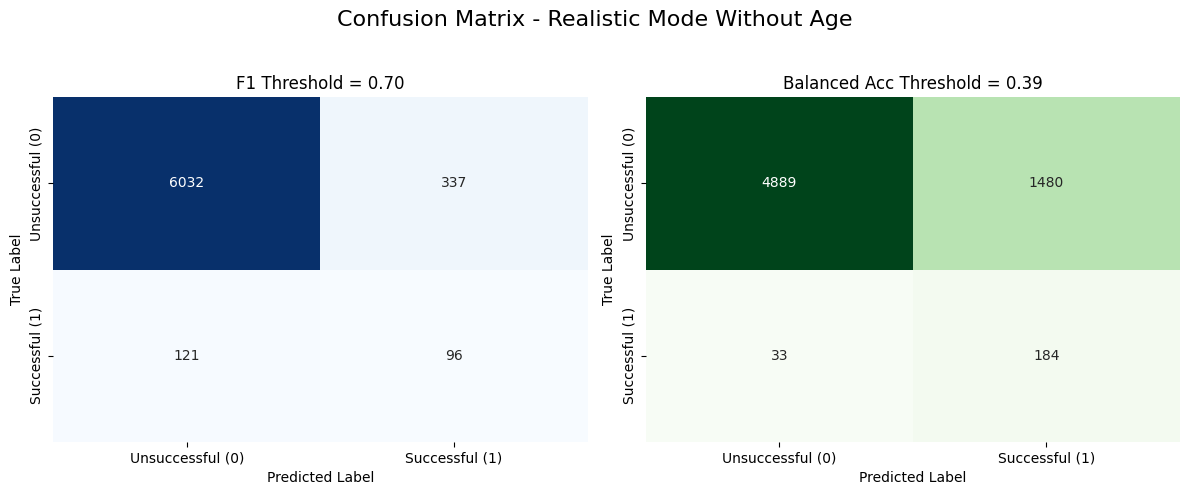

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ==============================================================================
# CONFUSION MATRIX PLOTS SIDE BY SIDE
# ==============================================================================

# Compute confusion matrices
cm_f1 = confusion_matrix(y_test, y_pred_f1_xgb)
cm_bal = confusion_matrix(y_test, y_pred_bal_xgb)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#  F1 Threshold 
sns.heatmap(cm_f1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[0])
axes[0].set_title(f"F1 Threshold = {thresholds_xgb['F1']:.2f}")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Balanced Accuracy Threshold
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[1])
axes[1].set_title(f"Balanced Acc Threshold = {thresholds_xgb['Balanced_Accuracy']:.2f}")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Overall title
plt.suptitle("Confusion Matrix - Realistic Mode Without Age", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Confusion Matrix - Realistic Mode")
plt.show()

In [7]:
import shap
shap.initjs()

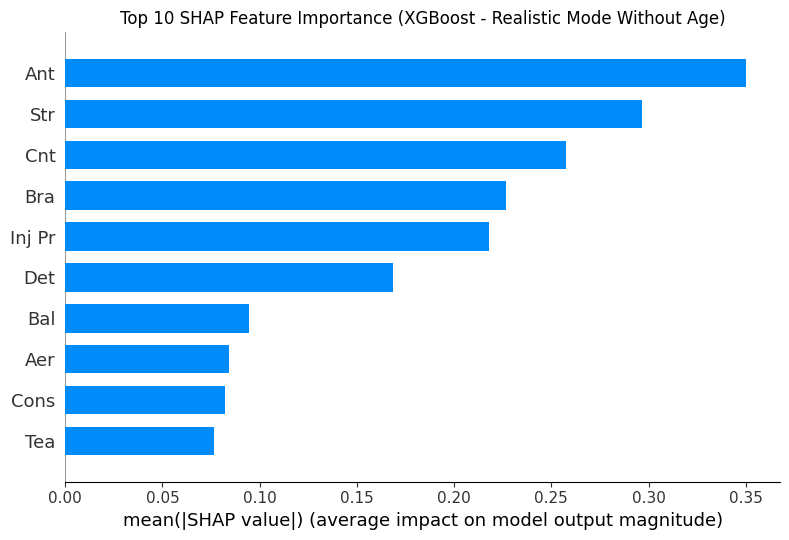

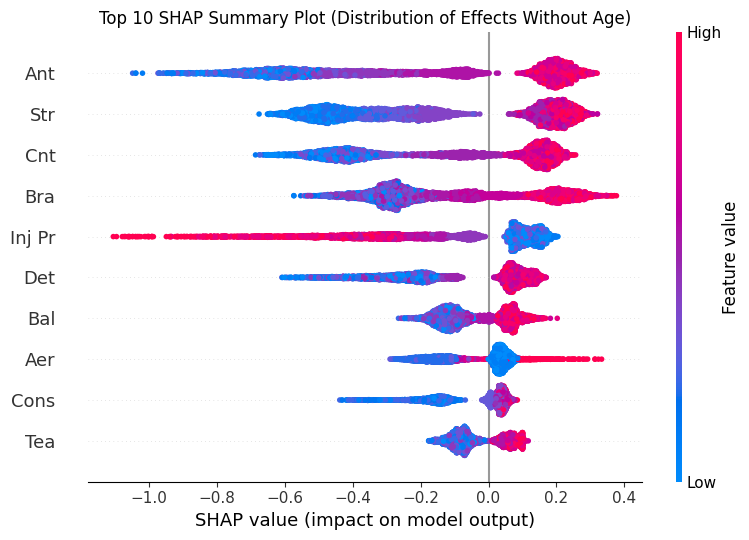

In [8]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===================================================================
# SHAP EXPLAINABILITY (XGBoost - GPU)
# ===================================================================

# Initialize SHAP JavaScript (for interactive use)
shap.initjs()

# Get the trained XGBoost model from the pipeline
xgb_model = final_pipe_xgb.named_steps["clf"]

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Save SHAP values
np.save("shap_values_xgb.npy", shap_values)

# ===================================================================
# GLOBAL FEATURE IMPORTANCE (Top 10 only)
# ===================================================================

# Compute mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Get indices of top 10 features
top10_idx = np.argsort(mean_abs_shap)[-10:][::-1]

# Subset the SHAP values and feature names
shap_values_top10 = shap_values[:, top10_idx]
X_test_top10 = X_test.iloc[:, top10_idx]

# Bar plot
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, plot_type="bar", show=False)
plt.title("Top 10 SHAP Feature Importance (XGBoost - Realistic Mode Without Age)")
plt.tight_layout()
plt.savefig("shap_feature_importance_bar_top10.png", dpi=300)
plt.show()
plt.close()

# Distribution summary (beeswarm)
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, show=False)
plt.title("Top 10 SHAP Summary Plot (Distribution of Effects Without Age)")
plt.tight_layout()
plt.savefig("shap_summary_distribution_top10.png", dpi=300)
plt.show()
plt.close()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import(
precision_recall_curve , recall_score , f1_score , balanced_accuracy_score ,
roc_auc_score , confusion_matrix , precision_score , classification_report ,
matthews_corrcoef , cohen_kappa_score
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import geometric_mean_score , classification_report_imbalanced
import joblib
import optuna
from optuna.samplers import TPESampler

# ==============================================================================
# CONFIGURATION
# ==============================================================================
MODE = "full"       # "realistic" drops CA/PA, "full" keeps them
SEED = 67
TEST_SIZE = 0.15
VAL_SIZE = 0.15
FILE_PATH = "/content/final_dataset_p90_success.xlsx"
N_TRIALS = 100


# ==============================================================================
# Load and transform data
# ==============================================================================
print("Reading file...")
df = pd.read_excel(FILE_PATH)
print(f"Dataset: {df.shape[0]:,} rows, {df.shape[1]} cols")
print(f"Success rate: {df['success_label'].mean()*100:.2f}%")


# drop irrelevant/leak columns
drop_cols = [
    'UID', 'Name', 'Club', 'Source_File',
    'UID_k1', 'UID_k2', 'UID_k3',
    'Transfer Value_k1', 'Transfer Value_k2', 'Transfer Value_k3',
    'success_k1', 'success_k2', 'success_k3',
    'Transfer Value',
    'Position', 'Nat',"Age"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# drop CA/PA if realistic
if MODE == "realistic":
    df = df.drop(columns=[c for c in ["CA", "PA"] if c in df.columns], errors='ignore')
    print("MODE=realistic -> Dropped CA and PA")
else:
    print("MODE=full -> Keeping CA and PA")

# feature engineering (if full mode)
if all(col in df.columns for col in ["PA", "CA"]):
    df["Growth_Ratio"] = df["PA"] / df["CA"].replace(0, 1)
    df["Growth_Room"] = df["PA"] - df["CA"]

X = df.drop(columns=["success_label"])
y = df["success_label"]
print(f"\nFeatures: {X.shape[1]}  |  Samples: {X.shape[0]:,}")
print(f"Success distribution: {y.value_counts().to_dict()}")

# Split Train / Temp (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=VAL_SIZE + TEST_SIZE, stratify=y, random_state=SEED)
# Split Validation / Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=SEED)


# ==============================================================================
# OPTUNA OBJECTIVE FUNCTION
# ==============================================================================
def objective(trial):
    # SMOTE parameters
    smote_level = trial.suggest_categorical("smote_level", ["small", "medium", "high"])
    smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[smote_level]
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=SEED)

    # XGBoost parameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "tree_method": "gpu_hist",  # Use GPU in Colab
        "random_state": SEED,
        "eval_metric": "logloss"
    }

    clf = XGBClassifier(**params, use_label_encoder=False)

    pipe = ImbPipeline([
        ("smote", smote),
        ("clf", clf)
    ])

    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    return balanced_accuracy_score(y_val, y_val_pred)

# ==============================================================================
# RUN OPTUNA STUDY
# ==============================================================================
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=SEED), study_name="XGBoost_Full")
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)

best_params = study.best_params
print("\nBest Hyperparameters:", best_params)

# ==============================================================================
# FINAL MODEL TRAINING
# ==============================================================================
best_params_xgb = study.best_params
smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[best_params_xgb['smote_level']]
best_smote_xgb= SMOTE(sampling_strategy=smote_ratio, random_state=SEED)


xgb_clf = XGBClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    colsample_bytree=best_params["colsample_bytree"],
    gamma=best_params["gamma"],
    reg_lambda=best_params["reg_lambda"],
    reg_alpha=best_params["reg_alpha"],
    tree_method="gpu_hist",  # GPU acceleration
    random_state=SEED,
    use_label_encoder=False,
    eval_metric="logloss"
)

final_pipe_xgb = ImbPipeline([
    ("smote", best_smote_xgb),
    ("clf", xgb_clf)
])

final_pipe_xgb.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Reading file...


[I 2025-12-07 17:22:50,609] A new study created in memory with name: XGBoost_Full


Dataset: 43,903 rows, 82 cols
Success rate: 3.29%
MODE=full -> Keeping CA and PA

Features: 66  |  Samples: 43,903
Success distribution: {0: 42460, 1: 1443}


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:22:52,075] Trial 0 finished with value: 0.757873423352698 and parameters: {'smote_level': 'medium', 'n_estimators': 232, 'max_depth': 3, 'learning_rate': 0.0372030992310257, 'subsample': 0.6852599434737423, 'colsample_bytree': 0.9730026600325441, 'gamma': 3.6140914942793105, 'reg_lambda': 0.124105381329643, 'reg_alpha': 4.106554246922489}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:22:53,377] Trial 1 finished with value: 0.7262979536295598 and parameters: {'smote_level': 'small', 'n_estimators': 175, 'max_depth': 5, 'learning_rate': 0.02398715961802208, 'subsample': 0.6044456461293007, 'colsample_bytree': 0.7638354039473789, 'gamma': 2.061272257629838, 'reg_lambda': 0.12200497542695123, 'reg_alpha': 4.775043967143612}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:22:55,031] Trial 2 finished with value: 0.6827089984473405 and parameters: {'smote_level': 'medium', 'n_estimators': 223, 'max_depth': 7, 'learning_rate': 0.11130236949854995, 'subsample': 0.9813698212790307, 'colsample_bytree': 0.8407699229007761, 'gamma': 2.011257849732101, 'reg_lambda': 0.5126965547823584, 'reg_alpha': 4.070817451529237}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:22:56,881] Trial 3 finished with value: 0.695577318958148 and parameters: {'smote_level': 'high', 'n_estimators': 173, 'max_depth': 8, 'learning_rate': 0.12108336578262786, 'subsample': 0.6184559914235704, 'colsample_bytree': 0.9878345575091758, 'gamma': 1.8527177160030517, 'reg_lambda': 2.593513273531763, 'reg_alpha': 1.369653507991646}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:22:58,963] Trial 4 finished with value: 0.6785100573960678 and parameters: {'smote_level': 'medium', 'n_estimators': 491, 'max_depth': 3, 'learning_rate': 0.20952859869129206, 'subsample': 0.7416816720920439, 'colsample_bytree': 0.9708141342722716, 'gamma': 2.002438338561486, 'reg_lambda': 0.8647735161772228, 'reg_alpha': 2.2372360543881724}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:22:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:02,080] Trial 5 finished with value: 0.7087214982292702 and parameters: {'smote_level': 'small', 'n_estimators': 371, 'max_depth': 6, 'learning_rate': 0.021500171213086904, 'subsample': 0.6607342165872642, 'colsample_bytree': 0.7814207517983819, 'gamma': 4.109489402713902, 'reg_lambda': 1.8875378029848822, 'reg_alpha': 4.985826798679207}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:05,069] Trial 6 finished with value: 0.6681942481812948 and parameters: {'smote_level': 'small', 'n_estimators': 376, 'max_depth': 5, 'learning_rate': 0.13720466600024972, 'subsample': 0.6750707006976931, 'colsample_bytree': 0.785602332749154, 'gamma': 0.06206772379572234, 'reg_lambda': 0.20563069135604445, 'reg_alpha': 0.8424929655394603}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:07,045] Trial 7 finished with value: 0.6847097922227456 and parameters: {'smote_level': 'medium', 'n_estimators': 243, 'max_depth': 9, 'learning_rate': 0.14908924043977712, 'subsample': 0.6588957406814445, 'colsample_bytree': 0.6952278886083997, 'gamma': 2.3284030773147784, 'reg_lambda': 7.933761202724934, 'reg_alpha': 2.634537739131204}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:08,432] Trial 8 finished with value: 0.7039752010606932 and parameters: {'smote_level': 'small', 'n_estimators': 108, 'max_depth': 8, 'learning_rate': 0.022055410388994137, 'subsample': 0.9175466294277452, 'colsample_bytree': 0.7322446953048619, 'gamma': 0.13480886279005622, 'reg_lambda': 8.513656174066792, 'reg_alpha': 4.739645974595556}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:10,454] Trial 9 finished with value: 0.6899293016520996 and parameters: {'smote_level': 'small', 'n_estimators': 422, 'max_depth': 6, 'learning_rate': 0.11238031518425252, 'subsample': 0.7157759383328506, 'colsample_bytree': 0.6384542062025221, 'gamma': 3.3358902069016265, 'reg_lambda': 6.775262630486915, 'reg_alpha': 0.5728747228781511}. Best is trial 0 with value: 0.757873423352698.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:12,293] Trial 10 finished with value: 0.8302748992515832 and parameters: {'smote_level': 'high', 'n_estimators': 305, 'max_depth': 3, 'learning_rate': 0.010609701321034655, 'subsample': 0.8278331261396423, 'colsample_bytree': 0.8867949149635789, 'gamma': 4.7541639252868, 'reg_lambda': 0.2869426729039935, 'reg_alpha': 3.278653693654581}. Best is trial 10 with value: 0.8302748992515832.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:14,356] Trial 11 finished with value: 0.827058364299297 and parameters: {'smote_level': 'high', 'n_estimators': 293, 'max_depth': 3, 'learning_rate': 0.01162677499306044, 'subsample': 0.8528284447230342, 'colsample_bytree': 0.891459679846103, 'gamma': 4.794423884250189, 'reg_lambda': 0.26880407843264764, 'reg_alpha': 3.420271901523221}. Best is trial 10 with value: 0.8302748992515832.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:17,029] Trial 12 finished with value: 0.8320848816315138 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.010545830746577164, 'subsample': 0.8444982941613374, 'colsample_bytree': 0.8808917331804552, 'gamma': 4.925601505244534, 'reg_lambda': 0.3287021496983881, 'reg_alpha': 2.9848054368967127}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:19,219] Trial 13 finished with value: 0.8290635194780273 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.01057875242841594, 'subsample': 0.8133450542975815, 'colsample_bytree': 0.887196342793939, 'gamma': 4.923374840914375, 'reg_lambda': 0.44162978858439894, 'reg_alpha': 2.7603739181615428}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:21,352] Trial 14 finished with value: 0.7195039775998325 and parameters: {'smote_level': 'high', 'n_estimators': 324, 'max_depth': 4, 'learning_rate': 0.06361181874949928, 'subsample': 0.859275066424465, 'colsample_bytree': 0.9078459565954486, 'gamma': 4.205509988238366, 'reg_lambda': 0.29140207464208207, 'reg_alpha': 1.8549460099978707}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:23,986] Trial 15 finished with value: 0.8203243575652902 and parameters: {'smote_level': 'high', 'n_estimators': 374, 'max_depth': 4, 'learning_rate': 0.015286757177546406, 'subsample': 0.7803062554357736, 'colsample_bytree': 0.8463057031795832, 'gamma': 2.9463021150597815, 'reg_lambda': 0.8427421853735839, 'reg_alpha': 3.3457156440852636}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:26,285] Trial 16 finished with value: 0.7230345335915285 and parameters: {'smote_level': 'high', 'n_estimators': 268, 'max_depth': 5, 'learning_rate': 0.04605287557575876, 'subsample': 0.9091472975051158, 'colsample_bytree': 0.9305632063711164, 'gamma': 1.066572399458976, 'reg_lambda': 0.4423928535439043, 'reg_alpha': 3.3615221274387026}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:33,177] Trial 17 finished with value: 0.7301785122380977 and parameters: {'smote_level': 'high', 'n_estimators': 438, 'max_depth': 10, 'learning_rate': 0.01660309275562441, 'subsample': 0.790154803802702, 'colsample_bytree': 0.8388077427833204, 'gamma': 4.307639644792285, 'reg_lambda': 1.643960481930721, 'reg_alpha': 3.9398336502160354}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:35,480] Trial 18 finished with value: 0.7439038485022941 and parameters: {'smote_level': 'high', 'n_estimators': 359, 'max_depth': 4, 'learning_rate': 0.03315961977244627, 'subsample': 0.8918949392453593, 'colsample_bytree': 0.9408079095610176, 'gamma': 4.98264111881834, 'reg_lambda': 0.20734998238147728, 'reg_alpha': 1.8697721758582309}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:37,566] Trial 19 finished with value: 0.7291535824566913 and parameters: {'smote_level': 'high', 'n_estimators': 343, 'max_depth': 3, 'learning_rate': 0.0784874727037465, 'subsample': 0.9642060377449615, 'colsample_bytree': 0.823169658947906, 'gamma': 3.6822248296676836, 'reg_lambda': 0.6794945046930143, 'reg_alpha': 3.0208229321934272}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:41,267] Trial 20 finished with value: 0.7689721044643325 and parameters: {'smote_level': 'high', 'n_estimators': 413, 'max_depth': 5, 'learning_rate': 0.015736065771951076, 'subsample': 0.8298762410314344, 'colsample_bytree': 0.8808573122539516, 'gamma': 2.8026839755521586, 'reg_lambda': 1.3907518528905771, 'reg_alpha': 2.273423521567267}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:43,625] Trial 21 finished with value: 0.831378334292842 and parameters: {'smote_level': 'high', 'n_estimators': 306, 'max_depth': 4, 'learning_rate': 0.010385468253197187, 'subsample': 0.8171434929508006, 'colsample_bytree': 0.8699940591489874, 'gamma': 4.573149010556248, 'reg_lambda': 0.4089901404055869, 'reg_alpha': 2.820464036978551}. Best is trial 12 with value: 0.8320848816315138.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:45,697] Trial 22 finished with value: 0.835575094642452 and parameters: {'smote_level': 'high', 'n_estimators': 279, 'max_depth': 4, 'learning_rate': 0.010067512132838949, 'subsample': 0.7603655799320738, 'colsample_bytree': 0.8756252000317138, 'gamma': 4.4955644466765206, 'reg_lambda': 0.3437224950923682, 'reg_alpha': 3.728369377234697}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:48,522] Trial 23 finished with value: 0.79466840250519 and parameters: {'smote_level': 'high', 'n_estimators': 280, 'max_depth': 6, 'learning_rate': 0.0137154137584053, 'subsample': 0.7655612198400065, 'colsample_bytree': 0.9315897727785091, 'gamma': 4.417489942087822, 'reg_lambda': 0.513319694539938, 'reg_alpha': 3.8473590385299987}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:50,549] Trial 24 finished with value: 0.8353777411419898 and parameters: {'smote_level': 'high', 'n_estimators': 253, 'max_depth': 4, 'learning_rate': 0.010041840193856195, 'subsample': 0.7471555481457725, 'colsample_bytree': 0.8592114594749746, 'gamma': 3.9744459781195904, 'reg_lambda': 0.1593077401603142, 'reg_alpha': 2.7218943093227783}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:52,717] Trial 25 finished with value: 0.8007111268121632 and parameters: {'smote_level': 'high', 'n_estimators': 196, 'max_depth': 5, 'learning_rate': 0.027845668211607156, 'subsample': 0.7335366885251722, 'colsample_bytree': 0.8249522976384138, 'gamma': 3.903409679411071, 'reg_lambda': 0.18661189411284074, 'reg_alpha': 2.3230514539377367}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:56,416] Trial 26 finished with value: 0.7596768636276409 and parameters: {'smote_level': 'high', 'n_estimators': 258, 'max_depth': 7, 'learning_rate': 0.018482879914516373, 'subsample': 0.7086572007795827, 'colsample_bytree': 0.808018385435618, 'gamma': 3.289684880057199, 'reg_lambda': 0.10858545296867393, 'reg_alpha': 4.462575604123728}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:57,482] Trial 27 finished with value: 0.8324708658257881 and parameters: {'smote_level': 'high', 'n_estimators': 108, 'max_depth': 4, 'learning_rate': 0.014327044879922953, 'subsample': 0.7576616118434226, 'colsample_bytree': 0.7447627346536675, 'gamma': 3.935883238160962, 'reg_lambda': 0.14378025776787104, 'reg_alpha': 3.6829195414461644}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:58,611] Trial 28 finished with value: 0.8081309642190471 and parameters: {'smote_level': 'medium', 'n_estimators': 103, 'max_depth': 5, 'learning_rate': 0.012839979237222313, 'subsample': 0.756799445526021, 'colsample_bytree': 0.7357968078921984, 'gamma': 3.7943018996696667, 'reg_lambda': 0.15759227296733402, 'reg_alpha': 3.6387050644553733}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:23:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:23:59,864] Trial 29 finished with value: 0.8274574327035467 and parameters: {'smote_level': 'high', 'n_estimators': 137, 'max_depth': 3, 'learning_rate': 0.03743363311023284, 'subsample': 0.7019408711778523, 'colsample_bytree': 0.671350132484768, 'gamma': 3.3777154039617976, 'reg_lambda': 0.1429594993220815, 'reg_alpha': 4.551157161553563}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:02,083] Trial 30 finished with value: 0.7374751400010466 and parameters: {'smote_level': 'medium', 'n_estimators': 218, 'max_depth': 6, 'learning_rate': 0.02853802300402425, 'subsample': 0.793851423863174, 'colsample_bytree': 0.6047822842200143, 'gamma': 2.8945544518864295, 'reg_lambda': 0.10142321068803739, 'reg_alpha': 4.251652243640775}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:03,559] Trial 31 finished with value: 0.8331392508853649 and parameters: {'smote_level': 'high', 'n_estimators': 156, 'max_depth': 4, 'learning_rate': 0.013306126030709756, 'subsample': 0.7618182344060113, 'colsample_bytree': 0.7376297816413026, 'gamma': 4.0831193846084135, 'reg_lambda': 0.3179383489904343, 'reg_alpha': 3.0587902069598423}. Best is trial 22 with value: 0.835575094642452.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:05,044] Trial 32 finished with value: 0.8402832295319342 and parameters: {'smote_level': 'high', 'n_estimators': 144, 'max_depth': 4, 'learning_rate': 0.019726504986518532, 'subsample': 0.7413244356575723, 'colsample_bytree': 0.7494636711146869, 'gamma': 3.9873456414278894, 'reg_lambda': 0.2152505799602444, 'reg_alpha': 3.707922209695404}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:06,828] Trial 33 finished with value: 0.8345501648610457 and parameters: {'smote_level': 'high', 'n_estimators': 147, 'max_depth': 3, 'learning_rate': 0.018403670396027718, 'subsample': 0.7320994035605449, 'colsample_bytree': 0.7129571957243015, 'gamma': 3.554785338848629, 'reg_lambda': 0.22445305478210822, 'reg_alpha': 4.194243759936104}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:08,335] Trial 34 finished with value: 0.829178006315312 and parameters: {'smote_level': 'high', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01905954429786009, 'subsample': 0.7260542091275745, 'colsample_bytree': 0.7026779532341295, 'gamma': 3.488197334959195, 'reg_lambda': 0.24264595820555157, 'reg_alpha': 4.245646789108103}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:09,535] Trial 35 finished with value: 0.8261948064409205 and parameters: {'smote_level': 'high', 'n_estimators': 138, 'max_depth': 3, 'learning_rate': 0.024424873881859308, 'subsample': 0.6318101820709281, 'colsample_bytree': 0.7645527073338968, 'gamma': 4.50786921906919, 'reg_lambda': 0.1670231867178579, 'reg_alpha': 4.08945555547964}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:10,667] Trial 36 finished with value: 0.6905170007501613 and parameters: {'smote_level': 'small', 'n_estimators': 178, 'max_depth': 3, 'learning_rate': 0.2965125729043498, 'subsample': 0.6956913537656182, 'colsample_bytree': 0.7059878508089924, 'gamma': 3.100155044006198, 'reg_lambda': 0.1274898797349046, 'reg_alpha': 3.661790543297932}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:12,732] Trial 37 finished with value: 0.7579519286125503 and parameters: {'smote_level': 'medium', 'n_estimators': 226, 'max_depth': 5, 'learning_rate': 0.018093891359883305, 'subsample': 0.6796136417443098, 'colsample_bytree': 0.8572134530688973, 'gamma': 3.6706945279484344, 'reg_lambda': 0.5909810476588623, 'reg_alpha': 1.9361699417355325}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:14,749] Trial 38 finished with value: 0.8060025993963817 and parameters: {'smote_level': 'high', 'n_estimators': 137, 'max_depth': 4, 'learning_rate': 0.040690311015726496, 'subsample': 0.7377987457456934, 'colsample_bytree': 0.7955905117996872, 'gamma': 2.36177961639275, 'reg_lambda': 3.00955594844704, 'reg_alpha': 1.3673187701694993}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:17,458] Trial 39 finished with value: 0.7193535091851154 and parameters: {'smote_level': 'small', 'n_estimators': 247, 'max_depth': 5, 'learning_rate': 0.0212909448716724, 'subsample': 0.645193522188954, 'colsample_bytree': 0.7641923743748995, 'gamma': 1.3346784919532924, 'reg_lambda': 0.24547739358243287, 'reg_alpha': 4.9704912114662205}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:20,839] Trial 40 finished with value: 0.7224893581758867 and parameters: {'smote_level': 'medium', 'n_estimators': 169, 'max_depth': 8, 'learning_rate': 0.02629272823617407, 'subsample': 0.7759991629645112, 'colsample_bytree': 0.6615637027953114, 'gamma': 4.1254786120367, 'reg_lambda': 0.3885007020971962, 'reg_alpha': 0.13575563408397118}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:22,309] Trial 41 finished with value: 0.8383184173339614 and parameters: {'smote_level': 'high', 'n_estimators': 160, 'max_depth': 4, 'learning_rate': 0.01273274791553058, 'subsample': 0.7475471485745543, 'colsample_bytree': 0.7221858402535204, 'gamma': 4.018743526734774, 'reg_lambda': 0.34044202532550916, 'reg_alpha': 3.202081291167116}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:24,041] Trial 42 finished with value: 0.8340006280420789 and parameters: {'smote_level': 'high', 'n_estimators': 209, 'max_depth': 3, 'learning_rate': 0.01288415289186466, 'subsample': 0.7387721340364963, 'colsample_bytree': 0.715342424758779, 'gamma': 4.621089940859604, 'reg_lambda': 0.21398322135832662, 'reg_alpha': 4.400984928983361}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:25,545] Trial 43 finished with value: 0.834354992062246 and parameters: {'smote_level': 'high', 'n_estimators': 155, 'max_depth': 4, 'learning_rate': 0.011863992118051211, 'subsample': 0.7165378063574566, 'colsample_bytree': 0.7534673812165119, 'gamma': 4.3032482784890895, 'reg_lambda': 0.3538103590557574, 'reg_alpha': 3.872941540325327}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:26,788] Trial 44 finished with value: 0.8276798642731285 and parameters: {'smote_level': 'high', 'n_estimators': 123, 'max_depth': 3, 'learning_rate': 0.010068006500448845, 'subsample': 0.6843633621272303, 'colsample_bytree': 0.7756271005167718, 'gamma': 3.862020709262787, 'reg_lambda': 0.18509607759981198, 'reg_alpha': 2.4815471406439356}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:28,537] Trial 45 finished with value: 0.8340878561085815 and parameters: {'smote_level': 'high', 'n_estimators': 183, 'max_depth': 4, 'learning_rate': 0.020038108680260125, 'subsample': 0.7492581309953473, 'colsample_bytree': 0.6773806992503071, 'gamma': 3.547869292311869, 'reg_lambda': 0.6899548371162053, 'reg_alpha': 3.159592488118819}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:31,608] Trial 46 finished with value: 0.7164509952722388 and parameters: {'smote_level': 'small', 'n_estimators': 235, 'max_depth': 7, 'learning_rate': 0.015536466899757453, 'subsample': 0.7816577146863853, 'colsample_bytree': 0.7225837733570964, 'gamma': 2.696489061457828, 'reg_lambda': 1.102837831798159, 'reg_alpha': 3.5391831072586686}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:34,105] Trial 47 finished with value: 0.827881579176916 and parameters: {'smote_level': 'high', 'n_estimators': 283, 'max_depth': 3, 'learning_rate': 0.011625103030258826, 'subsample': 0.721674334929359, 'colsample_bytree': 0.6854529233853313, 'gamma': 4.072335445617359, 'reg_lambda': 0.24714342745920423, 'reg_alpha': 2.6961071838039476}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:35,938] Trial 48 finished with value: 0.728998752638649 and parameters: {'smote_level': 'high', 'n_estimators': 160, 'max_depth': 5, 'learning_rate': 0.08562381515474254, 'subsample': 0.8052434300474665, 'colsample_bytree': 0.6443113414904504, 'gamma': 3.1613687104925496, 'reg_lambda': 0.125467544724027, 'reg_alpha': 4.66516346256569}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:37,257] Trial 49 finished with value: 0.8310599518501073 and parameters: {'smote_level': 'high', 'n_estimators': 121, 'max_depth': 4, 'learning_rate': 0.01668279253389046, 'subsample': 0.6626978363798065, 'colsample_bytree': 0.969559893940209, 'gamma': 4.707423740675426, 'reg_lambda': 0.3109861455654455, 'reg_alpha': 3.2138604949327565}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:39,063] Trial 50 finished with value: 0.8150666858568413 and parameters: {'smote_level': 'high', 'n_estimators': 190, 'max_depth': 5, 'learning_rate': 0.02271213765613154, 'subsample': 0.606093025898087, 'colsample_bytree': 0.9045862230869185, 'gamma': 4.342590163202846, 'reg_lambda': 4.562946595102, 'reg_alpha': 4.000369633315736}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:40,409] Trial 51 finished with value: 0.8338839605031315 and parameters: {'smote_level': 'high', 'n_estimators': 159, 'max_depth': 4, 'learning_rate': 0.012167606961453642, 'subsample': 0.7162057535627357, 'colsample_bytree': 0.7999535942050982, 'gamma': 4.271590691482213, 'reg_lambda': 0.3651201982361281, 'reg_alpha': 3.8361974946943866}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:41,776] Trial 52 finished with value: 0.8323138553060834 and parameters: {'smote_level': 'high', 'n_estimators': 146, 'max_depth': 4, 'learning_rate': 0.011450673935969996, 'subsample': 0.6952918618726288, 'colsample_bytree': 0.7629438120322076, 'gamma': 3.9561607081999304, 'reg_lambda': 0.4935568023283904, 'reg_alpha': 3.4805569737079503}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:44,498] Trial 53 finished with value: 0.8181240295877601 and parameters: {'smote_level': 'high', 'n_estimators': 334, 'max_depth': 4, 'learning_rate': 0.014394060596514812, 'subsample': 0.7472516666479228, 'colsample_bytree': 0.7514743396120617, 'gamma': 3.6803058500550256, 'reg_lambda': 0.21736319376979993, 'reg_alpha': 2.869930249010281}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:46,901] Trial 54 finished with value: 0.8288618045742397 and parameters: {'smote_level': 'high', 'n_estimators': 258, 'max_depth': 3, 'learning_rate': 0.011695872055386285, 'subsample': 0.774310170244303, 'colsample_bytree': 0.7249289344605447, 'gamma': 4.398723112070375, 'reg_lambda': 0.3564100405142991, 'reg_alpha': 4.281310889348194}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:50,294] Trial 55 finished with value: 0.7940807034071282 and parameters: {'smote_level': 'high', 'n_estimators': 495, 'max_depth': 4, 'learning_rate': 0.016861968588002145, 'subsample': 0.7231685505718544, 'colsample_bytree': 0.7885688081752117, 'gamma': 4.75928127137129, 'reg_lambda': 0.27707350105594153, 'reg_alpha': 3.7982075280300007}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:51,180] Trial 56 finished with value: 0.7001306240295878 and parameters: {'smote_level': 'small', 'n_estimators': 124, 'max_depth': 3, 'learning_rate': 0.010038222953604656, 'subsample': 0.7948997121751217, 'colsample_bytree': 0.818083502717611, 'gamma': 4.191069047695184, 'reg_lambda': 0.1769101374823352, 'reg_alpha': 2.5060214322727266}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:52,909] Trial 57 finished with value: 0.7382939934753406 and parameters: {'smote_level': 'high', 'n_estimators': 168, 'max_depth': 5, 'learning_rate': 0.05380043105277914, 'subsample': 0.6672410250629718, 'colsample_bytree': 0.8615228346549528, 'gamma': 4.488702045429113, 'reg_lambda': 0.5654306514811942, 'reg_alpha': 3.3477122853719865}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:56,507] Trial 58 finished with value: 0.7404561591737757 and parameters: {'smote_level': 'high', 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.03065194651709343, 'subsample': 0.7061859096486752, 'colsample_bytree': 0.712867543548013, 'gamma': 0.4659080122355177, 'reg_lambda': 0.8338011451386913, 'reg_alpha': 4.031847800216021}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:24:59,125] Trial 59 finished with value: 0.8132207218994785 and parameters: {'smote_level': 'high', 'n_estimators': 184, 'max_depth': 6, 'learning_rate': 0.014296586923256971, 'subsample': 0.7673044667085921, 'colsample_bytree': 0.8428988352405876, 'gamma': 3.447179926639045, 'reg_lambda': 0.4717275563129863, 'reg_alpha': 3.509830720097471}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:24:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:00,647] Trial 60 finished with value: 0.8170718410355715 and parameters: {'smote_level': 'medium', 'n_estimators': 207, 'max_depth': 4, 'learning_rate': 0.012343872915662309, 'subsample': 0.7365657355276326, 'colsample_bytree': 0.7500248364589938, 'gamma': 4.022678757082229, 'reg_lambda': 0.1462156117547747, 'reg_alpha': 2.9145862199624712}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:02,228] Trial 61 finished with value: 0.8344422201287487 and parameters: {'smote_level': 'high', 'n_estimators': 187, 'max_depth': 4, 'learning_rate': 0.0204665440642188, 'subsample': 0.745730191972348, 'colsample_bytree': 0.6904101445593722, 'gamma': 3.5436973137765984, 'reg_lambda': 0.7024177053027252, 'reg_alpha': 3.213843436554296}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:03,444] Trial 62 finished with value: 0.836474634078261 and parameters: {'smote_level': 'high', 'n_estimators': 120, 'max_depth': 4, 'learning_rate': 0.017412558648400148, 'subsample': 0.7513169096233336, 'colsample_bytree': 0.6929220871134423, 'gamma': 3.771831453771631, 'reg_lambda': 0.9739218317074404, 'reg_alpha': 3.1622157113013807}. Best is trial 32 with value: 0.8402832295319342.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:04,569] Trial 63 finished with value: 0.8404380593499765 and parameters: {'smote_level': 'high', 'n_estimators': 101, 'max_depth': 4, 'learning_rate': 0.024181992111472456, 'subsample': 0.7540412098087653, 'colsample_bytree': 0.6585646673596357, 'gamma': 3.8062439220844593, 'reg_lambda': 1.1247688425067697, 'reg_alpha': 3.1465964082081195}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:05,559] Trial 64 finished with value: 0.832235350046231 and parameters: {'smote_level': 'high', 'n_estimators': 108, 'max_depth': 3, 'learning_rate': 0.024963243352798283, 'subsample': 0.756310549079026, 'colsample_bytree': 0.6401801957472815, 'gamma': 3.7446453937857447, 'reg_lambda': 2.317228934801442, 'reg_alpha': 3.017679013684446}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:06,917] Trial 65 finished with value: 0.8329484394898903 and parameters: {'smote_level': 'high', 'n_estimators': 120, 'max_depth': 5, 'learning_rate': 0.017742788775312143, 'subsample': 0.806638551867714, 'colsample_bytree': 0.65940416229837, 'gamma': 3.1547026317538855, 'reg_lambda': 1.143466525168667, 'reg_alpha': 2.5540429874846313}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:08,228] Trial 66 finished with value: 0.8179266760872979 and parameters: {'smote_level': 'high', 'n_estimators': 132, 'max_depth': 4, 'learning_rate': 0.03329885499223637, 'subsample': 0.7859025213878992, 'colsample_bytree': 0.6292498257617156, 'gamma': 3.883893165264566, 'reg_lambda': 1.3454719775737072, 'reg_alpha': 2.711343714350866}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:09,835] Trial 67 finished with value: 0.836555320039776 and parameters: {'smote_level': 'high', 'n_estimators': 103, 'max_depth': 5, 'learning_rate': 0.014701041894133028, 'subsample': 0.8264848677288883, 'colsample_bytree': 0.6949292172016122, 'gamma': 3.3617899247461542, 'reg_lambda': 2.023709279756054, 'reg_alpha': 3.103364041096628}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:11,473] Trial 68 finished with value: 0.8380469199769718 and parameters: {'smote_level': 'high', 'n_estimators': 106, 'max_depth': 5, 'learning_rate': 0.01513373439970147, 'subsample': 0.8460104521293816, 'colsample_bytree': 0.6189401562673098, 'gamma': 2.661048597696957, 'reg_lambda': 2.2875123937055575, 'reg_alpha': 2.018418199419412}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:13,293] Trial 69 finished with value: 0.8275359379633991 and parameters: {'smote_level': 'high', 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01471557396738733, 'subsample': 0.8240534610590711, 'colsample_bytree': 0.6055912802047686, 'gamma': 1.7364905331998801, 'reg_lambda': 3.639448585139252, 'reg_alpha': 1.7541174183642203}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:15,301] Trial 70 finished with value: 0.8346733745049808 and parameters: {'smote_level': 'high', 'n_estimators': 116, 'max_depth': 5, 'learning_rate': 0.015992530496696366, 'subsample': 0.8434362397283054, 'colsample_bytree': 0.6228458045266501, 'gamma': 2.5967413604871825, 'reg_lambda': 1.888180375201958, 'reg_alpha': 2.0974285994733406}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:16,711] Trial 71 finished with value: 0.8337694736658467 and parameters: {'smote_level': 'high', 'n_estimators': 114, 'max_depth': 5, 'learning_rate': 0.01356129463471532, 'subsample': 0.8718934432329699, 'colsample_bytree': 0.6531759409741242, 'gamma': 2.065364353595618, 'reg_lambda': 1.8906300949359798, 'reg_alpha': 2.3525369804950818}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:19,487] Trial 72 finished with value: 0.8108721062088937 and parameters: {'smote_level': 'high', 'n_estimators': 132, 'max_depth': 9, 'learning_rate': 0.01127258254914807, 'subsample': 0.8673818419019677, 'colsample_bytree': 0.6774198339253287, 'gamma': 2.9780506309014427, 'reg_lambda': 2.8102803998897063, 'reg_alpha': 1.6494628947477659}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:20,471] Trial 73 finished with value: 0.834709356082413 and parameters: {'smote_level': 'high', 'n_estimators': 102, 'max_depth': 4, 'learning_rate': 0.02215862703020475, 'subsample': 0.8862913817542554, 'colsample_bytree': 0.6196908137658743, 'gamma': 3.3252890104874133, 'reg_lambda': 1.5887129734579932, 'reg_alpha': 2.119692522905097}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:22,774] Trial 74 finished with value: 0.8318918895343765 and parameters: {'smote_level': 'high', 'n_estimators': 298, 'max_depth': 4, 'learning_rate': 0.013343824023937795, 'subsample': 0.8367203822858569, 'colsample_bytree': 0.6978409233388234, 'gamma': 3.780925343717981, 'reg_lambda': 2.2869210908893676, 'reg_alpha': 3.071868469624019}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:24,491] Trial 75 finished with value: 0.8031088082901554 and parameters: {'smote_level': 'medium', 'n_estimators': 134, 'max_depth': 5, 'learning_rate': 0.010769969539319258, 'subsample': 0.7708569384074959, 'colsample_bytree': 0.9044049760615623, 'gamma': 4.13543274516932, 'reg_lambda': 3.5016819741672016, 'reg_alpha': 3.3837179168801366}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:26,253] Trial 76 finished with value: 0.674941339125277 and parameters: {'smote_level': 'small', 'n_estimators': 273, 'max_depth': 6, 'learning_rate': 0.1731234911060658, 'subsample': 0.8120352841721834, 'colsample_bytree': 0.6499745675582123, 'gamma': 3.972861144564036, 'reg_lambda': 4.99347096832035, 'reg_alpha': 3.6796532181247765}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:29,845] Trial 77 finished with value: 0.7746604647511384 and parameters: {'smote_level': 'high', 'n_estimators': 479, 'max_depth': 4, 'learning_rate': 0.01918566732168199, 'subsample': 0.999702185538048, 'colsample_bytree': 0.6644487125144828, 'gamma': 3.268470865468138, 'reg_lambda': 1.397553414279413, 'reg_alpha': 1.2938444696138784}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:31,368] Trial 78 finished with value: 0.8357342858638195 and parameters: {'smote_level': 'high', 'n_estimators': 145, 'max_depth': 5, 'learning_rate': 0.014999513239848682, 'subsample': 0.7997665919492678, 'colsample_bytree': 0.6800404111162939, 'gamma': 2.4310615770144883, 'reg_lambda': 0.7949796130130898, 'reg_alpha': 2.8236207379949865}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:32,924] Trial 79 finished with value: 0.8329484394898903 and parameters: {'smote_level': 'high', 'n_estimators': 143, 'max_depth': 5, 'learning_rate': 0.015196751620512887, 'subsample': 0.820859296694507, 'colsample_bytree': 0.685150962101871, 'gamma': 2.384737828063512, 'reg_lambda': 0.9653050154655165, 'reg_alpha': 2.824675435062113}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:36,666] Trial 80 finished with value: 0.7757595383890721 and parameters: {'smote_level': 'high', 'n_estimators': 403, 'max_depth': 5, 'learning_rate': 0.016787617843783756, 'subsample': 0.7966971589374879, 'colsample_bytree': 0.7024992663510055, 'gamma': 1.929034355872814, 'reg_lambda': 1.6358574820143594, 'reg_alpha': 3.153903020524627}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:38,390] Trial 81 finished with value: 0.8320401772474311 and parameters: {'smote_level': 'high', 'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.012740998638112672, 'subsample': 0.7546827361169102, 'colsample_bytree': 0.6713432683792255, 'gamma': 2.1251101909493246, 'reg_lambda': 0.7682576662712955, 'reg_alpha': 2.5885787569431247}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:39,663] Trial 82 finished with value: 0.8292924931525968 and parameters: {'smote_level': 'high', 'n_estimators': 111, 'max_depth': 4, 'learning_rate': 0.013923455914726124, 'subsample': 0.8498497672993965, 'colsample_bytree': 0.8765432018506981, 'gamma': 2.50630651761607, 'reg_lambda': 0.9793399505375195, 'reg_alpha': 2.977772568912037}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:41,453] Trial 83 finished with value: 0.8344378587254235 and parameters: {'smote_level': 'high', 'n_estimators': 169, 'max_depth': 5, 'learning_rate': 0.010685442072858882, 'subsample': 0.9333837028925954, 'colsample_bytree': 0.7266366694463858, 'gamma': 1.5996291438077586, 'reg_lambda': 1.172591309659306, 'reg_alpha': 3.2526949760118504}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:43,901] Trial 84 finished with value: 0.8143601385181696 and parameters: {'smote_level': 'high', 'n_estimators': 317, 'max_depth': 4, 'learning_rate': 0.01754240934152912, 'subsample': 0.8327684423371802, 'colsample_bytree': 0.6318305290719084, 'gamma': 2.2568812189661895, 'reg_lambda': 1.373864186266279, 'reg_alpha': 2.422291517361029}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:45,195] Trial 85 finished with value: 0.8356535999023045 and parameters: {'smote_level': 'high', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.015615385993243632, 'subsample': 0.785337643320438, 'colsample_bytree': 0.8313749149254299, 'gamma': 3.602662564436676, 'reg_lambda': 2.1220470020212736, 'reg_alpha': 2.756582973075152}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:46,583] Trial 86 finished with value: 0.8205151689607648 and parameters: {'smote_level': 'high', 'n_estimators': 102, 'max_depth': 6, 'learning_rate': 0.019661305012338884, 'subsample': 0.7835109916194856, 'colsample_bytree': 0.7353124935528321, 'gamma': 3.002129332186161, 'reg_lambda': 2.216947980957627, 'reg_alpha': 2.7836738561565784}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:48,122] Trial 87 finished with value: 0.8183213830882224 and parameters: {'smote_level': 'high', 'n_estimators': 113, 'max_depth': 6, 'learning_rate': 0.023204388463540532, 'subsample': 0.7610685651573168, 'colsample_bytree': 0.6920754475253379, 'gamma': 2.827085035288361, 'reg_lambda': 0.41840585161641347, 'reg_alpha': 2.209578925672097}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:49,959] Trial 88 finished with value: 0.8377732419183196 and parameters: {'smote_level': 'high', 'n_estimators': 127, 'max_depth': 5, 'learning_rate': 0.015173347476470048, 'subsample': 0.8000946381620805, 'colsample_bytree': 0.6129555480057701, 'gamma': 4.879511505388656, 'reg_lambda': 2.5607855639180093, 'reg_alpha': 3.549312156169094}. Best is trial 63 with value: 0.8404380593499765.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:51,538] Trial 89 finished with value: 0.8411086251112158 and parameters: {'smote_level': 'high', 'n_estimators': 126, 'max_depth': 5, 'learning_rate': 0.015646409585903527, 'subsample': 0.800849277347801, 'colsample_bytree': 0.6157644078898303, 'gamma': 4.996359323927698, 'reg_lambda': 2.6551806603620154, 'reg_alpha': 3.6070215597218986}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:53,097] Trial 90 finished with value: 0.710213098166466 and parameters: {'smote_level': 'small', 'n_estimators': 129, 'max_depth': 7, 'learning_rate': 0.021128279557759387, 'subsample': 0.8623288217108926, 'colsample_bytree': 0.6331732984184937, 'gamma': 2.7040730352639093, 'reg_lambda': 3.1235374090330943, 'reg_alpha': 3.585825063129522}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:54,585] Trial 91 finished with value: 0.8356557806039672 and parameters: {'smote_level': 'high', 'n_estimators': 142, 'max_depth': 5, 'learning_rate': 0.015595232665725038, 'subsample': 0.8035445411858648, 'colsample_bytree': 0.6466740676230625, 'gamma': 4.625651994280826, 'reg_lambda': 2.5247038546609564, 'reg_alpha': 3.4378812261119576}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:56,102] Trial 92 finished with value: 0.8304787948570332 and parameters: {'smote_level': 'high', 'n_estimators': 146, 'max_depth': 5, 'learning_rate': 0.018012496870933377, 'subsample': 0.8035365578492237, 'colsample_bytree': 0.6000579948975299, 'gamma': 4.861846048161488, 'reg_lambda': 2.6447186162812826, 'reg_alpha': 3.4432619789183803}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:57,785] Trial 93 finished with value: 0.8361268121630816 and parameters: {'smote_level': 'high', 'n_estimators': 139, 'max_depth': 5, 'learning_rate': 0.016201070343296507, 'subsample': 0.8165333946561819, 'colsample_bytree': 0.6162449041927248, 'gamma': 4.735440129329206, 'reg_lambda': 3.202230910676702, 'reg_alpha': 3.3163561591656294}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:25:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:25:59,814] Trial 94 finished with value: 0.7951394340643045 and parameters: {'smote_level': 'high', 'n_estimators': 160, 'max_depth': 6, 'learning_rate': 0.026371754612160465, 'subsample': 0.8382759987836474, 'colsample_bytree': 0.6244033446140825, 'gamma': 4.932225209888087, 'reg_lambda': 3.7851148214848207, 'reg_alpha': 3.3117124109676372}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:26:02,681] Trial 95 finished with value: 0.8359698016433768 and parameters: {'smote_level': 'high', 'n_estimators': 121, 'max_depth': 5, 'learning_rate': 0.019013880183016994, 'subsample': 0.8170731770724593, 'colsample_bytree': 0.6122767629142336, 'gamma': 4.6815228523492785, 'reg_lambda': 4.181800669051823, 'reg_alpha': 3.1139285927075537}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:26:03,963] Trial 96 finished with value: 0.8022834127108738 and parameters: {'smote_level': 'medium', 'n_estimators': 117, 'max_depth': 5, 'learning_rate': 0.020529641117922614, 'subsample': 0.8125817517353701, 'colsample_bytree': 0.6126522759896084, 'gamma': 4.818697370091429, 'reg_lambda': 4.470717206301142, 'reg_alpha': 3.0996613428553292}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:26:05,249] Trial 97 finished with value: 0.8343615341672337 and parameters: {'smote_level': 'high', 'n_estimators': 125, 'max_depth': 5, 'learning_rate': 0.019332357943244, 'subsample': 0.827830608339644, 'colsample_bytree': 0.614700647435702, 'gamma': 4.674262174722716, 'reg_lambda': 5.370627359203574, 'reg_alpha': 3.7272530100669434}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:26:06,559] Trial 98 finished with value: 0.8378920901589295 and parameters: {'smote_level': 'high', 'n_estimators': 133, 'max_depth': 5, 'learning_rate': 0.016993907509929664, 'subsample': 0.8515006240650143, 'colsample_bytree': 0.6142823244732022, 'gamma': 4.9364348758173815, 'reg_lambda': 7.2814403110302015, 'reg_alpha': 3.2774935839778436}. Best is trial 89 with value: 0.8411086251112158.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:26:07,929] Trial 99 finished with value: 0.8385201322377489 and parameters: {'smote_level': 'high', 'n_estimators': 136, 'max_depth': 5, 'learning_rate': 0.01693483781482128, 'subsample': 0.8534120947502674, 'colsample_bytree': 0.6368371606453028, 'gamma': 4.89117518416165, 'reg_lambda': 6.560995945771354, 'reg_alpha': 3.58925680375241}. Best is trial 89 with value: 0.8411086251112158.

Best Hyperparameters: {'smote_level': 'high', 'n_estimators': 126, 'max_depth': 5, 'learning_rate': 0.015646409585903527, 'subsample': 0.800849277347801, 'colsample_bytree': 0.6157644078898303, 'gamma': 4.996359323927698, 'reg_lambda': 2.6551806603620154, 'reg_alpha': 3.6070215597218986}


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,1.0
,random_state,67
,k_neighbors,5
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [10]:
fig2 = optuna.visualization.plot_optimization_history(study)
fig2.write_html("optimization_history_full.html")
fig2.show()

In [11]:
print(study.best_value)
best_params

0.8411086251112158


{'smote_level': 'high',
 'n_estimators': 126,
 'max_depth': 5,
 'learning_rate': 0.015646409585903527,
 'subsample': 0.800849277347801,
 'colsample_bytree': 0.6157644078898303,
 'gamma': 4.996359323927698,
 'reg_lambda': 2.6551806603620154,
 'reg_alpha': 3.6070215597218986}

In [12]:
# ==============================================================================
# FINAL EVALUATION ON TEST (XGBoost - Full Mode)
# ==============================================================================

# Predict probabilities
y_test_pred_prop_xgb_full = final_pipe_xgb.predict_proba(X_test)[:, 1]

# Find thresholds
thresholds_xgb_full = {"F1": None, "Balanced_Accuracy": None}
best_f1_xgb_full = 0
best_bal_xgb_full = 0

for t in np.arange(0.1, 0.91, 0.01):
    y_pred_t = (y_test_pred_prop_xgb_full >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    bal_t = balanced_accuracy_score(y_test, y_pred_t)

    if f1_t > best_f1_xgb_full:
        best_f1_xgb_full = f1_t
        thresholds_xgb_full["F1"] = t
    if bal_t > best_bal_xgb_full:
        best_bal_xgb_full = bal_t
        thresholds_xgb_full["Balanced_Accuracy"] = t

# Predictions
y_pred_f1_xgb_full = (y_test_pred_prop_xgb_full >= thresholds_xgb_full["F1"]).astype(int)
y_pred_bal_xgb_full = (y_test_pred_prop_xgb_full >= thresholds_xgb_full["Balanced_Accuracy"]).astype(int)

# Metrics dicts
metrics_f1_xgb_full = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_f1_xgb_full),
    "precision": precision_score(y_test, y_pred_f1_xgb_full),
    "recall": recall_score(y_test, y_pred_f1_xgb_full),
    "f1": f1_score(y_test, y_pred_f1_xgb_full),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb_full),
    "geometric_mean": geometric_mean_score(y_test, y_pred_f1_xgb_full),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_f1_xgb_full),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_f1_xgb_full)
}

metrics_bal_xgb_full = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_bal_xgb_full),
    "precision": precision_score(y_test, y_pred_bal_xgb_full),
    "recall": recall_score(y_test, y_pred_bal_xgb_full),
    "f1": f1_score(y_test, y_pred_bal_xgb_full),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb_full),
    "geometric_mean": geometric_mean_score(y_test, y_pred_bal_xgb_full),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_bal_xgb_full),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_bal_xgb_full)
}

# Print XGBoost results
print("\nFINAL EVALUATION ON TEST SET (XGBoost - FULL MODE)")
print("="*70)

print(f"\nUsing F1 Threshold ({thresholds_xgb_full['F1']:.3f})")
print(f"Balanced Accuracy: {metrics_f1_xgb_full['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_f1_xgb_full['precision']:.4f}")
print(f"Recall: {metrics_f1_xgb_full['recall']:.4f}")
print(f"F1 Score: {metrics_f1_xgb_full['f1']:.4f}")
print(f"ROC-AUC: {metrics_f1_xgb_full['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_f1_xgb_full['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_f1_xgb_full['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_f1_xgb_full['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_f1_xgb_full))
print("\nClassification Report:\n", classification_report(y_test, y_pred_f1_xgb_full))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_f1_xgb_full))

print(f"\nUsing Balanced Accuracy Threshold ({thresholds_xgb_full['Balanced_Accuracy']:.3f})")
print(f"Balanced Accuracy: {metrics_bal_xgb_full['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_bal_xgb_full['precision']:.4f}")
print(f"Recall: {metrics_bal_xgb_full['recall']:.4f}")
print(f"F1 Score: {metrics_bal_xgb_full['f1']:.4f}")
print(f"ROC-AUC: {metrics_bal_xgb_full['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_bal_xgb_full['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_bal_xgb_full['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_bal_xgb_full['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal_xgb_full))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal_xgb_full))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_bal_xgb_full))

# Save study results
best_params_xgb_full = study.best_params
best_value_xgb_full = study.best_value
study_xgb_full = study

# Save XGBoost model dict
model_dict_xgb_full = {
    "best_params": best_params_xgb_full,
    "best_value": best_value_xgb_full,
    "thresholds": thresholds_xgb_full,
    "metrics_f1": metrics_f1_xgb_full,
    "metrics_balanced_accuracy": metrics_bal_xgb_full,
    "study": study_xgb_full,
    "model": final_pipe_xgb
}

joblib.dump(model_dict_xgb_full, "XGBoost_full_model.pkl")


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:26:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"





FINAL EVALUATION ON TEST SET (XGBoost - FULL MODE)

Using F1 Threshold (0.810)
Balanced Accuracy: 0.6616
Precision: 0.5669
Recall: 0.3318
F1 Score: 0.4186
ROC-AUC: 0.9189
Geometric Mean: 0.5735
Matthews Corr: 0.4195
Cohen Kappa: 0.4041

Confusion Matrix:
 [[6314   55]
 [ 145   72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6369
           1       0.57      0.33      0.42       217

    accuracy                           0.97      6586
   macro avg       0.77      0.66      0.70      6586
weighted avg       0.96      0.97      0.97      6586


Imbalanced Report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.99      0.33      0.98      0.57      0.35      6369
          1       0.57      0.33      0.99      0.42      0.57      0.31       217

avg / total       0.96      0.97      0.35      0.97      0.57      0.35      6586


Using B

['XGBoost_full_model.pkl']

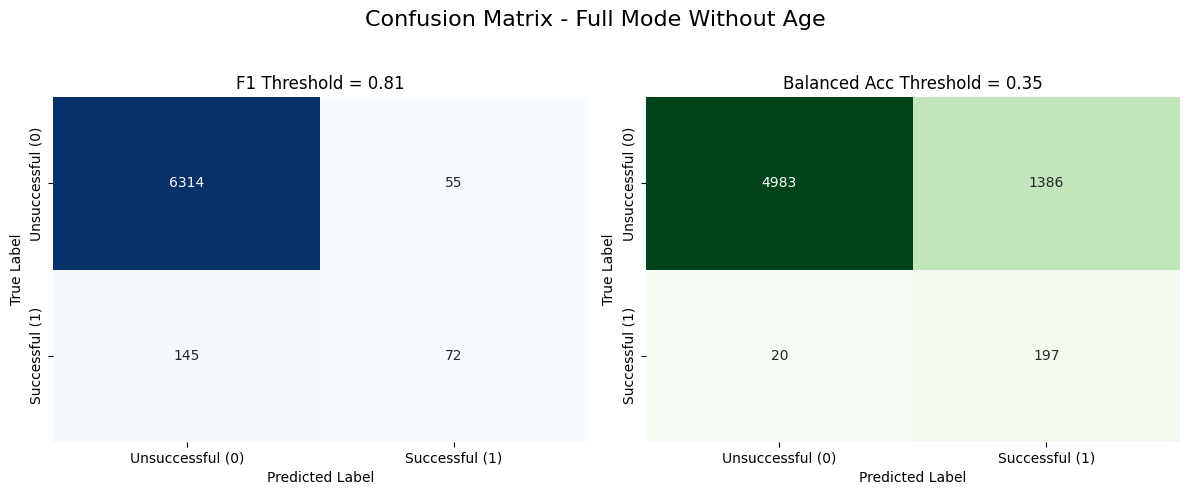

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ==============================================================================
# CONFUSION MATRIX PLOTS SIDE BY SIDE
# ==============================================================================

# Compute confusion matrices
cm_f1 = confusion_matrix(y_test, y_pred_f1_xgb_full)
cm_bal = confusion_matrix(y_test, y_pred_bal_xgb_full)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#  F1 Threshold 
sns.heatmap(cm_f1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[0])
axes[0].set_title(f"F1 Threshold = {thresholds_xgb_full['F1']:.2f}")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Balanced Accuracy Threshold
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[1])
axes[1].set_title(f"Balanced Acc Threshold = {thresholds_xgb_full['Balanced_Accuracy']:.2f}")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Overall title
plt.suptitle("Confusion Matrix - Full Mode Without Age", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Confusion Matrix - Full Mode")
plt.show()

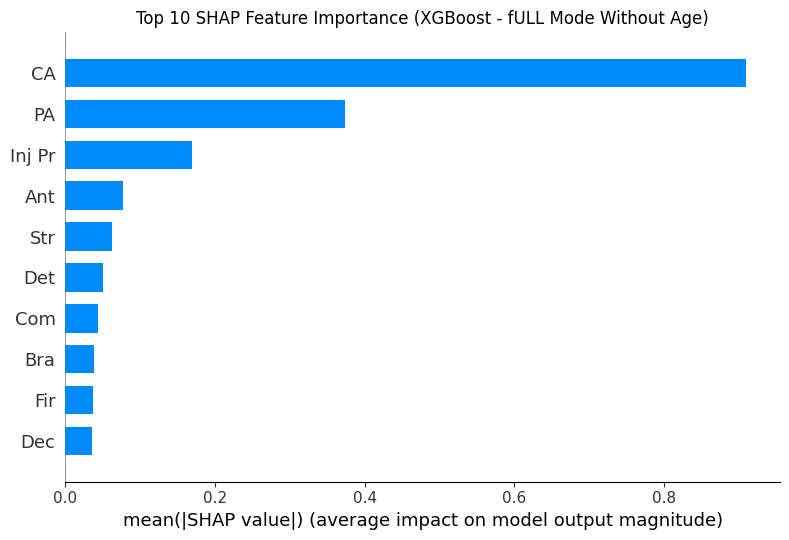

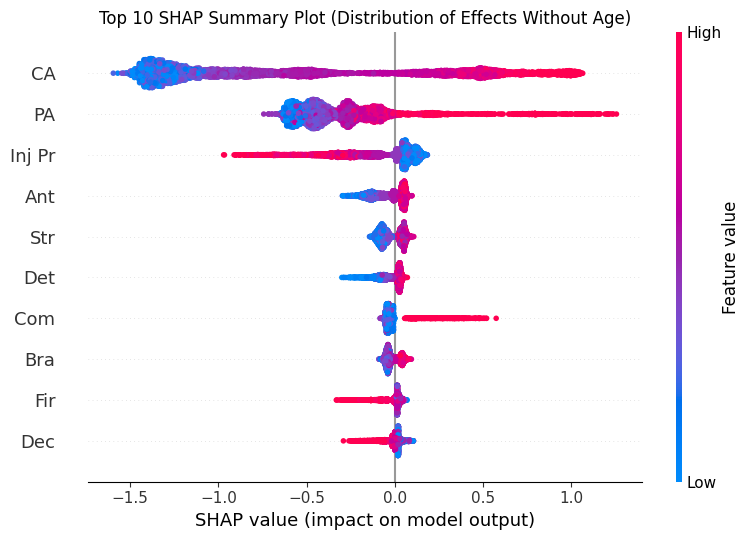

In [14]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===================================================================
# SHAP EXPLAINABILITY (XGBoost - GPU)
# ===================================================================

# Initialize SHAP JavaScript (for interactive use)
shap.initjs()

# Get the trained XGBoost model from the pipeline
xgb_model = final_pipe_xgb.named_steps["clf"]

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Save SHAP values
np.save("shap_values_xgb.npy", shap_values)

# ===================================================================
# GLOBAL FEATURE IMPORTANCE (Top 10 only)
# ===================================================================

# Compute mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Get indices of top 10 features
top10_idx = np.argsort(mean_abs_shap)[-10:][::-1]

# Subset the SHAP values and feature names
shap_values_top10 = shap_values[:, top10_idx]
X_test_top10 = X_test.iloc[:, top10_idx]

# Bar plot
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, plot_type="bar", show=False)
plt.title("Top 10 SHAP Feature Importance (XGBoost - fULL Mode Without Age)")
plt.tight_layout()
plt.savefig("shap_feature_importance_bar_top10.png", dpi=300)
plt.show()
plt.close()

# Distribution summary (beeswarm)
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, show=False)
plt.title("Top 10 SHAP Summary Plot (Distribution of Effects Without Age)")
plt.tight_layout()
plt.savefig("shap_summary_distribution_top10.png", dpi=300)
plt.show()
plt.close()

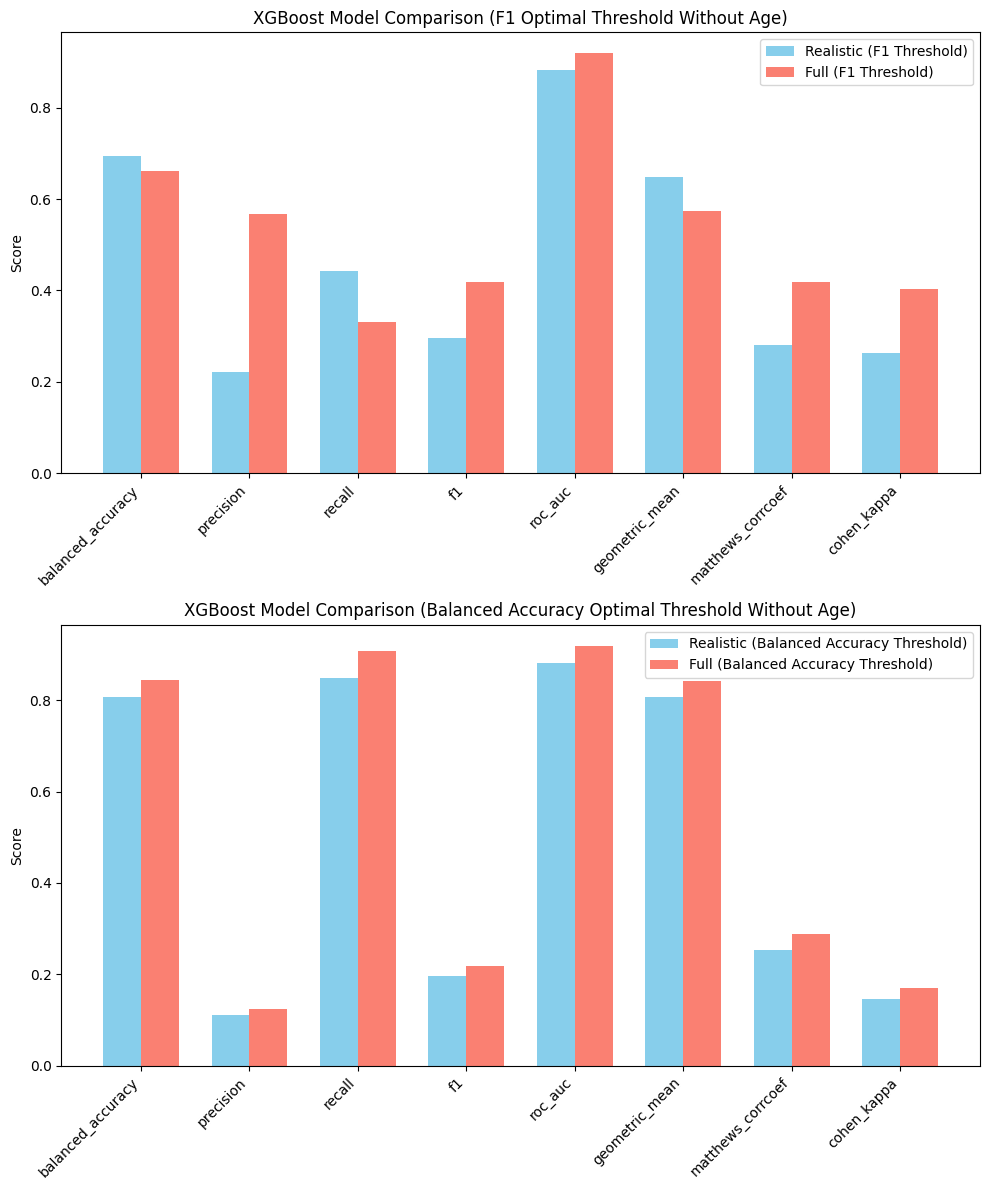

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract metrics for comparison
metrics_f1_realistic = model_dict_xgb['metrics_f1']
metrics_f1_full = model_dict_xgb_full['metrics_f1']
metrics_bal_realistic = model_dict_xgb['metrics_balanced_accuracy']
metrics_bal_full = model_dict_xgb_full['metrics_balanced_accuracy']

# Create DataFrames for easier plotting
df_f1 = pd.DataFrame({
    "Metric": metrics_f1_realistic.keys(),
    "Realistic (F1 Threshold)": metrics_f1_realistic.values(),
    "Full (F1 Threshold)": metrics_f1_full.values()
})

df_bal = pd.DataFrame({
    "Metric": metrics_bal_realistic.keys(),
    "Realistic (Balanced Accuracy Threshold)": metrics_bal_realistic.values(),
    "Full (Balanced Accuracy Threshold)": metrics_bal_full.values()
})

# Create a 2x1 grid of plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12)) 

# Plotting F1-optimal threshold metrics in the first subplot
bar_width = 0.35
x_f1 = np.arange(len(df_f1["Metric"]))

rects1_f1 = axes[0].bar(x_f1 - bar_width/2, df_f1["Realistic (F1 Threshold)"], bar_width, label='Realistic (F1 Threshold)', color='skyblue')
rects2_f1 = axes[0].bar(x_f1 + bar_width/2, df_f1["Full (F1 Threshold)"], bar_width, label='Full (F1 Threshold)', color='salmon')

axes[0].set_ylabel("Score")
axes[0].set_title("XGBoost Model Comparison (F1 Optimal Threshold Without Age)")
axes[0].set_xticks(x_f1)
axes[0].set_xticklabels(df_f1["Metric"], rotation=45, ha='right')
axes[0].legend()

# Plotting Balanced Accuracy-optimal threshold metrics in the second subplot
bar_width = 0.35
x_bal = np.arange(len(df_bal["Metric"]))

rects1_bal = axes[1].bar(x_bal - bar_width/2, df_bal["Realistic (Balanced Accuracy Threshold)"], bar_width, label='Realistic (Balanced Accuracy Threshold)', color='skyblue')
rects2_bal = axes[1].bar(x_bal + bar_width/2, df_bal["Full (Balanced Accuracy Threshold)"], bar_width, label='Full (Balanced Accuracy Threshold)', color='salmon')

axes[1].set_ylabel("Score")
axes[1].set_title("XGBoost Model Comparison (Balanced Accuracy Optimal Threshold Without Age)")
axes[1].set_xticks(x_bal)
axes[1].set_xticklabels(df_bal["Metric"], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
# Save the combined 2x1 plot
plt.savefig("xgboost_model_comparison_2x1_grid.png") 
plt.show()

Reading file...
Dataset: 43,903 rows, 82 cols
Success rate: 3.29%
Processing data for realistic mode -> Dropped CA and PA
Processing data for full mode -> Keeping CA and PA


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:30:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:30:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




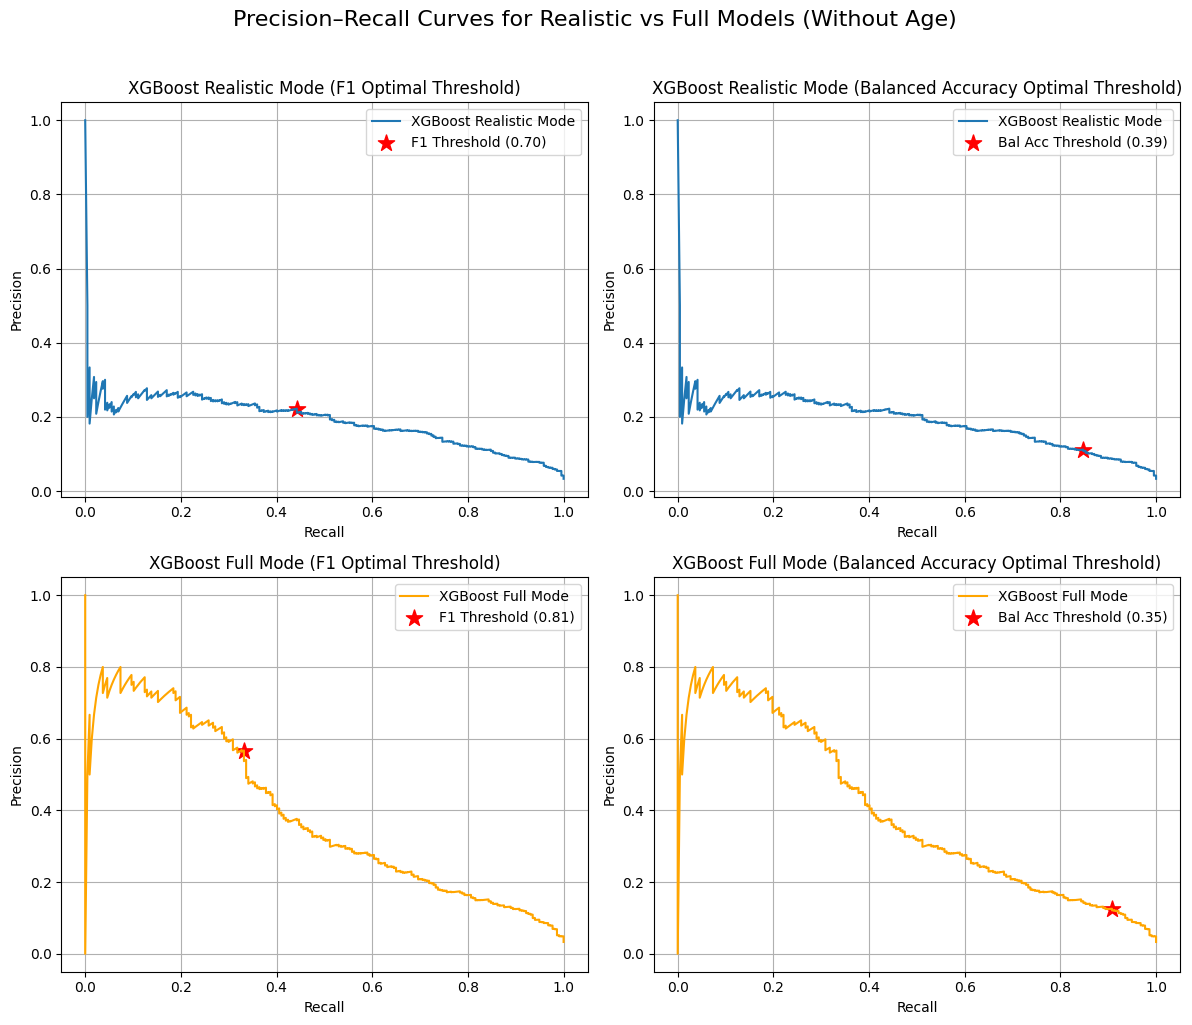

In [16]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import joblib

# ==============================================================================
# CONFIGURATION
# ==============================================================================
SEED = 67
TEST_SIZE = 0.15
VAL_SIZE = 0.15
FILE_PATH = "/content/final_dataset_p90_success.xlsx"

# ==============================================================================
# Load XGBoost Models
# ==============================================================================
xgb_realistic_model = joblib.load("XGBoost_realistic_model.pkl")
xgb_full_model = joblib.load("XGBoost_full_model.pkl")


# ==============================================================================
# Load and transform data
# ==============================================================================
print("Reading file...")
df = pd.read_excel(FILE_PATH)
print(f"Dataset: {df.shape[0]:,} rows, {df.shape[1]} cols")
print(f"Success rate: {df['success_label'].mean()*100:.2f}%")


# drop irrelevant/leak columns
drop_cols = [
    'UID', 'Name', 'Club', 'Source_File',
    'UID_k1', 'UID_k2', 'UID_k3',
    'Transfer Value_k1', 'Transfer Value_k2', 'Transfer Value_k3',
    'success_k1', 'success_k2', 'success_k3',
    'Transfer Value',
    'Position', 'Nat',"Age"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

MODE_realistic = "realistic"
MODE_full = "full"

# Data processing for realistic mode X_test
df_realistic = df.copy()
if MODE_realistic == "realistic":
    df_realistic = df_realistic.drop(columns=[c for c in ["CA", "PA"] if c in df_realistic.columns], errors='ignore')
    print("Processing data for realistic mode -> Dropped CA and PA")


X_realistic = df_realistic.drop(columns=["success_label"])
y_realistic = df_realistic["success_label"]

# Split Train / Temp (Validation + Test) for realistic
X_train_realistic, X_temp_realistic, y_train_realistic, y_temp_realistic = train_test_split(X_realistic, y_realistic, test_size=VAL_SIZE + TEST_SIZE, stratify=y_realistic, random_state=SEED)
# Split Validation / Test for realistic
X_val_realistic, X_test_realistic, y_val_realistic, y_test_realistic = train_test_split(X_temp_realistic, y_temp_realistic, test_size=0.5, stratify=y_temp_realistic, random_state=SEED)


# Data processing for full mode X_test
df_full = df.copy()
if MODE_full == "realistic": # This condition will be false, ensuring full mode processing
    df_full = df_full.drop(columns=[c for c in ["CA", "PA"] if c in df_full.columns], errors='ignore')
    print("Processing data for full mode -> Dropped CA and PA")
else:
    print("Processing data for full mode -> Keeping CA and PA")

# feature engineering (if full mode)
if all(col in df_full.columns for col in ["PA", "CA"]):
    df_full["Growth_Ratio"] = df_full["PA"] / df_full["CA"].replace(0, 1)
    df_full["Growth_Room"] = df_full["PA"] - df_full["CA"]

X_full = df_full.drop(columns=["success_label"])
y_full = df_full["success_label"]

X_train_full, X_temp_full, y_train_full, y_temp_full = train_test_split(X_full, y_full, test_size=VAL_SIZE + TEST_SIZE, stratify=y_full, random_state=SEED)
X_val_full, X_test_full, y_val_full, y_test_full = train_test_split(X_temp_full, y_temp_full, test_size=0.5, stratify=y_temp_full, random_state=SEED)


y_test = y_test_realistic


# Plotting Precision-Recall Curves (2x2 Grid)

# Get predicted probabilities for the test set for both models
y_test_pred_prop_realistic = xgb_realistic_model['model'].predict_proba(X_test_realistic)[:, 1]
y_test_pred_prop_full = xgb_full_model['model'].predict_proba(X_test_full)[:, 1]

# Calculate precision and recall for different thresholds for realistic model
precision_realistic, recall_realistic, thresholds_realistic = precision_recall_curve(y_test, y_test_pred_prop_realistic)

# Calculate precision and recall for different thresholds for full model
precision_full, recall_full, thresholds_full = precision_recall_curve(y_test, y_test_pred_prop_full)

# Get the optimal thresholds from the loaded models
f1_threshold_realistic = xgb_realistic_model['thresholds']['F1']
bal_acc_threshold_realistic = xgb_realistic_model['thresholds']['Balanced_Accuracy']
f1_threshold_full = xgb_full_model['thresholds']['F1']
bal_acc_threshold_full = xgb_full_model['thresholds']['Balanced_Accuracy']

# Find the precision and recall values at the optimal thresholds
f1_idx_realistic = np.argmax(thresholds_realistic >= f1_threshold_realistic) if np.any(thresholds_realistic >= f1_threshold_realistic) else len(thresholds_realistic) - 1
f1_precision_realistic = precision_realistic[f1_idx_realistic]
f1_recall_realistic = recall_realistic[f1_idx_realistic]

bal_acc_idx_realistic = np.argmax(thresholds_realistic >= bal_acc_threshold_realistic) if np.any(thresholds_realistic >= bal_acc_threshold_realistic) else len(thresholds_realistic) - 1
bal_acc_precision_realistic = precision_realistic[bal_acc_idx_realistic]
bal_acc_recall_realistic = recall_realistic[bal_acc_idx_realistic]

f1_idx_full = np.argmax(thresholds_full >= f1_threshold_full) if np.any(thresholds_full >= f1_threshold_full) else len(thresholds_full) - 1
f1_precision_full = precision_full[f1_idx_full]
f1_recall_full = recall_full[f1_idx_full]

bal_acc_idx_full = np.argmax(thresholds_full >= bal_acc_threshold_full) if np.any(thresholds_full >= bal_acc_threshold_full) else len(thresholds_full) - 1
bal_acc_precision_full = precision_full[bal_acc_idx_full]
bal_acc_recall_full = recall_full[bal_acc_idx_full]


# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Realistic Mode (F1 Threshold)
axes[0, 0].plot(recall_realistic, precision_realistic, label='XGBoost Realistic Mode', linestyle='-')
axes[0, 0].scatter(f1_recall_realistic, f1_precision_realistic, color='red', marker='*', s=150,
                   label=f'F1 Threshold ({f1_threshold_realistic:.2f})')
axes[0, 0].set_xlabel("Recall")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].set_title("XGBoost Realistic Mode (F1 Optimal Threshold)")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot Realistic Mode (Balanced Accuracy Threshold)
axes[0, 1].plot(recall_realistic, precision_realistic, label='XGBoost Realistic Mode', linestyle='-')
axes[0, 1].scatter(bal_acc_recall_realistic, bal_acc_precision_realistic, color='red', marker='*', s=150,
                   label=f'Bal Acc Threshold ({bal_acc_threshold_realistic:.2f})')
axes[0, 1].set_xlabel("Recall")
axes[0, 1].set_ylabel("Precision")
axes[0, 1].set_title("XGBoost Realistic Mode (Balanced Accuracy Optimal Threshold)")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot Full Mode (F1 Threshold)
axes[1, 0].plot(recall_full, precision_full, label='XGBoost Full Mode', color='orange', linestyle='-')
axes[1, 0].scatter(f1_recall_full, f1_precision_full, color='red', marker='*', s=150,
                   label=f'F1 Threshold ({f1_threshold_full:.2f})')
axes[1, 0].set_xlabel("Recall")
axes[1, 0].set_ylabel("Precision")
axes[1, 0].set_title("XGBoost Full Mode (F1 Optimal Threshold)")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot Full Mode (Balanced Accuracy Threshold)
axes[1, 1].plot(recall_full, precision_full, label='XGBoost Full Mode', color='orange', linestyle='-')
axes[1, 1].scatter(bal_acc_recall_full, bal_acc_precision_full, color='red', marker='*', s=150,
                   label=f'Bal Acc Threshold ({bal_acc_threshold_full:.2f})')
axes[1, 1].set_xlabel("Recall")
axes[1, 1].set_ylabel("Precision")
axes[1, 1].set_title("XGBoost Full Mode (Balanced Accuracy Optimal Threshold)")
axes[1, 1].legend()
axes[1, 1].grid(True)
fig.suptitle(
    "Precision–Recall Curves for Realistic vs Full Models (Without Age)",
    fontsize=16,
    y=1.02
)
plt.tight_layout()
plt.savefig("xgboost_precision_recall_4grid.png")
plt.show()

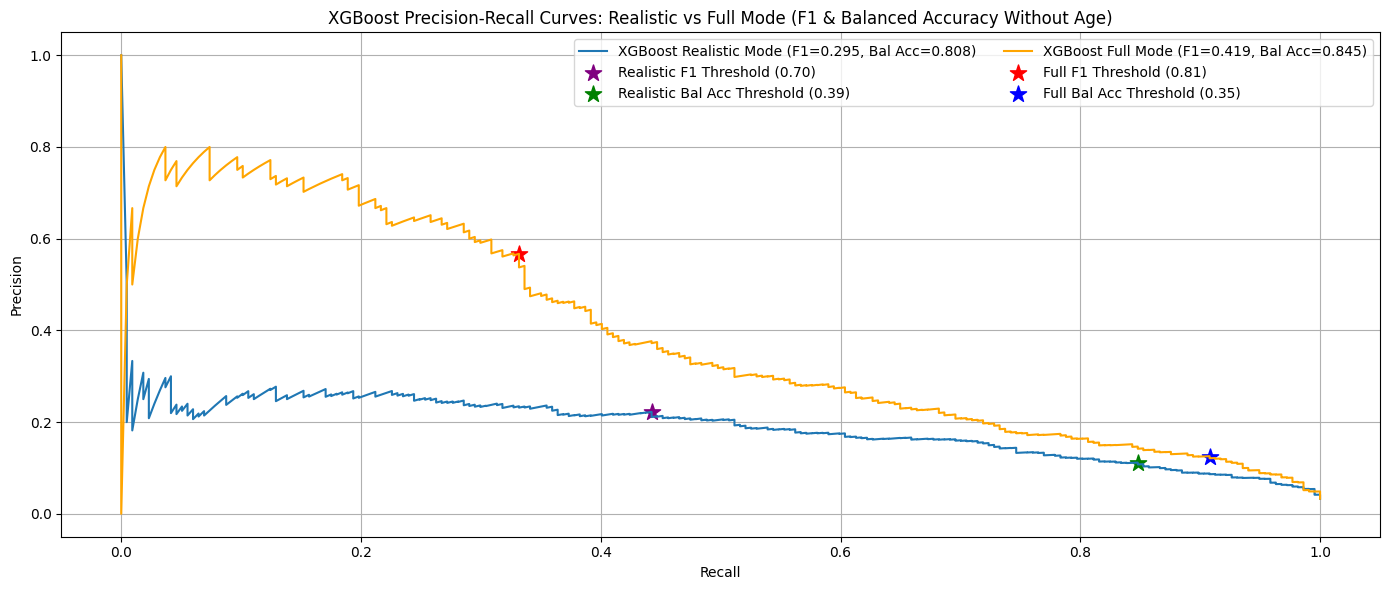

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve


precision_realistic, recall_realistic, thresholds_realistic = precision_recall_curve(y_test, y_test_pred_prop_realistic)

precision_full, recall_full, thresholds_full = precision_recall_curve(y_test, y_test_pred_prop_full)

f1_threshold_realistic = xgb_realistic_model['thresholds']['F1']
bal_acc_threshold_realistic = xgb_realistic_model['thresholds']['Balanced_Accuracy']
f1_threshold_full = xgb_full_model['thresholds']['F1']
bal_acc_threshold_full = xgb_full_model['thresholds']['Balanced_Accuracy']

f1_idx_realistic = np.searchsorted(thresholds_realistic, f1_threshold_realistic)
if f1_idx_realistic == len(thresholds_realistic): f1_idx_realistic -= 1
f1_precision_realistic = precision_realistic[f1_idx_realistic]
f1_recall_realistic = recall_realistic[f1_idx_realistic]

bal_acc_idx_realistic = np.searchsorted(thresholds_realistic, bal_acc_threshold_realistic)
if bal_acc_idx_realistic == len(thresholds_realistic): bal_acc_idx_realistic -= 1
bal_acc_precision_realistic = precision_realistic[bal_acc_idx_realistic]
bal_acc_recall_realistic = recall_realistic[bal_acc_idx_realistic]

f1_idx_full = np.searchsorted(thresholds_full, f1_threshold_full)
if f1_idx_full == len(thresholds_full): f1_idx_full -= 1
f1_precision_full = precision_full[f1_idx_full]
f1_recall_full = recall_full[f1_idx_full]

bal_acc_idx_full = np.searchsorted(thresholds_full, bal_acc_threshold_full)
if bal_acc_idx_full == len(thresholds_full): bal_acc_idx_full -= 1
bal_acc_precision_full = precision_full[bal_acc_idx_full]
bal_acc_recall_full = recall_full[bal_acc_idx_full]


plt.figure(figsize=(14, 6))

# XGBoost Realistic Mode
plt.plot(recall_realistic, precision_realistic, label=f'XGBoost Realistic Mode (F1={xgb_realistic_model["metrics_f1"]["f1"]:.3f}, Bal Acc={xgb_realistic_model["metrics_balanced_accuracy"]["balanced_accuracy"]:.3f})', linestyle='-')
plt.scatter(f1_recall_realistic, f1_precision_realistic, color='purple', marker='*', s=150,
            label=f'Realistic F1 Threshold ({f1_threshold_realistic:.2f})')
plt.scatter(bal_acc_recall_realistic, bal_acc_precision_realistic, color='green', marker='*', s=150,
            label=f'Realistic Bal Acc Threshold ({bal_acc_threshold_realistic:.2f})')

# XGBoost Full Mode
plt.plot(recall_full, precision_full, label=f'XGBoost Full Mode (F1={xgb_full_model["metrics_f1"]["f1"]:.3f}, Bal Acc={xgb_full_model["metrics_balanced_accuracy"]["balanced_accuracy"]:.3f})', color='orange', linestyle='-')
plt.scatter(f1_recall_full, f1_precision_full, color='red', marker='*', s=150,
            label=f'Full F1 Threshold ({f1_threshold_full:.2f})')
plt.scatter(bal_acc_recall_full, bal_acc_precision_full, color='blue', marker='*', s=150,
            label=f'Full Bal Acc Threshold ({bal_acc_threshold_full:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("XGBoost Precision-Recall Curves: Realistic vs Full Mode (F1 & Balanced Accuracy Without Age)")
plt.legend(ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_precision_recall_combined.png")
plt.show()

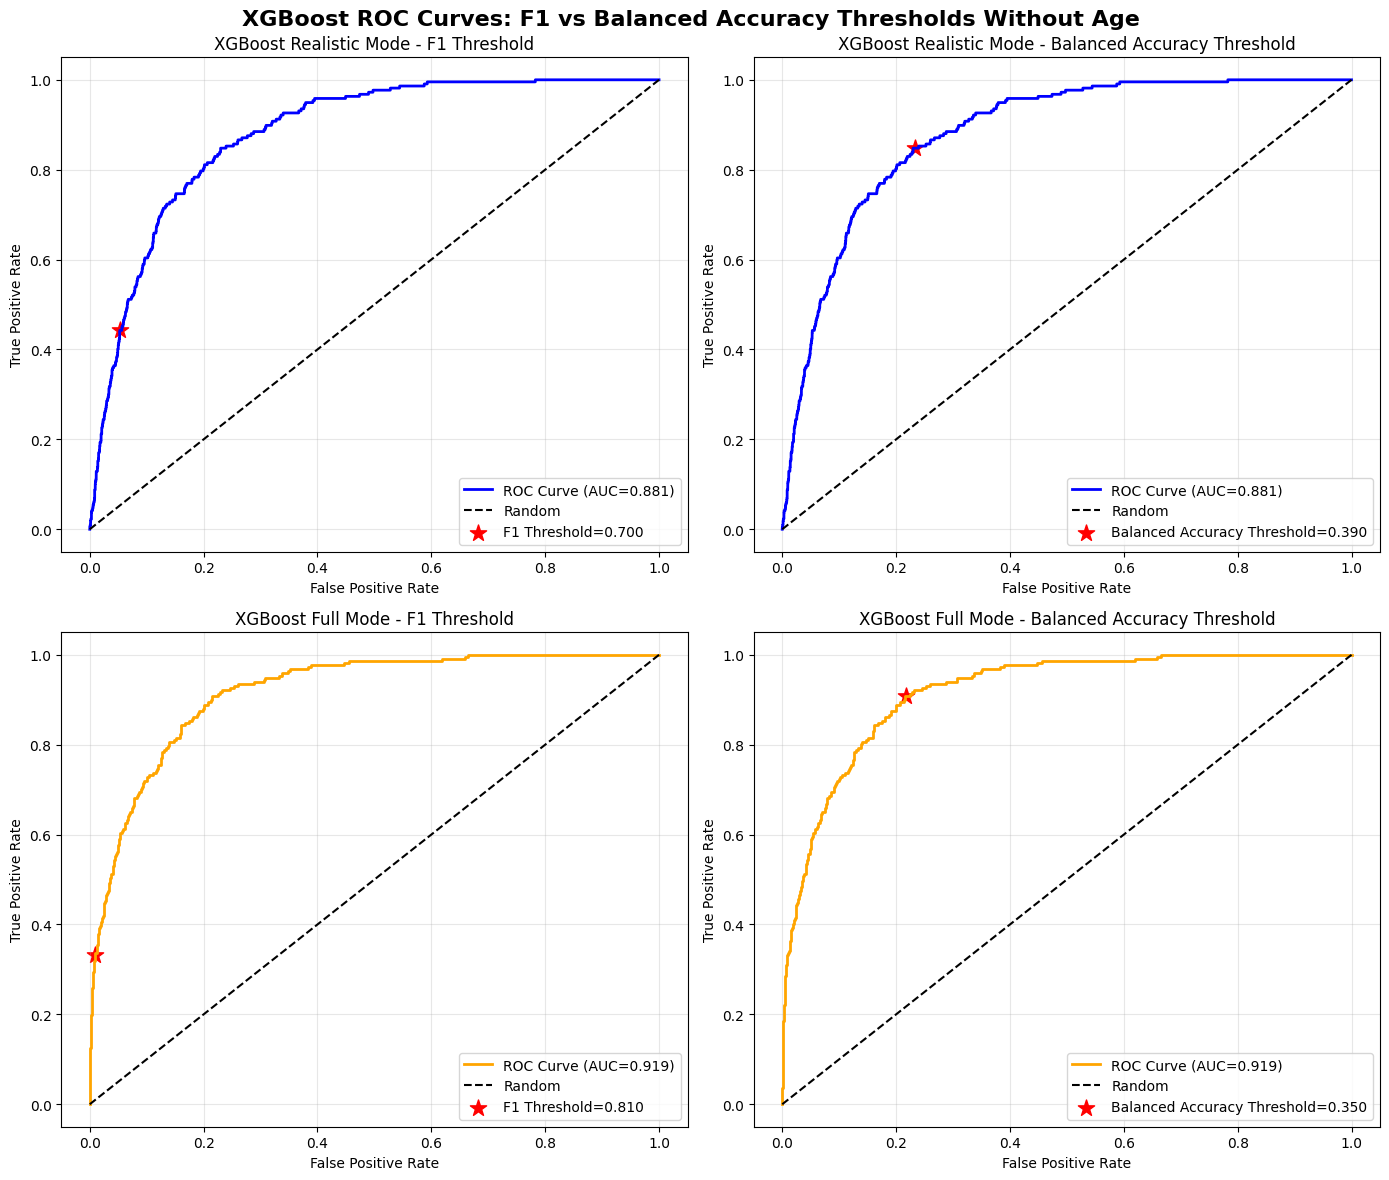

In [18]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

def roc_point(y_true, y_pred_prop, threshold):
    y_pred = (y_pred_prop >= threshold).astype(int)
    try:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    except ValueError:
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = (cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1])

    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return fpr, tpr

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('XGBoost ROC Curves: F1 vs Balanced Accuracy Thresholds Without Age ', fontsize=16, fontweight='bold')

# XGBoost Realistic Mode
fpr_real, tpr_real, _ = roc_curve(y_test, y_test_pred_prop_realistic)
roc_auc_real = auc(fpr_real, tpr_real)

# F1 Threshold
fpr_f1_real, tpr_f1_real = roc_point(y_test, y_test_pred_prop_realistic, xgb_realistic_model['thresholds']['F1'])
axes[0, 0].plot(fpr_real, tpr_real, 'b-', linewidth=2, label=f'ROC Curve (AUC={roc_auc_real:.3f})')
axes[0, 0].plot([0,1], [0,1], 'k--', label='Random')
axes[0, 0].scatter(fpr_f1_real, tpr_f1_real, color='red', s=150, marker='*',
                   label=f'F1 Threshold={xgb_realistic_model["thresholds"]["F1"]:.3f}')
axes[0, 0].set_title('XGBoost Realistic Mode - F1 Threshold')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(loc='best')

# Balanced Accuracy Threshold
fpr_bal_real, tpr_bal_real = roc_point(y_test, y_test_pred_prop_realistic, xgb_realistic_model['thresholds']['Balanced_Accuracy'])
axes[0, 1].plot(fpr_real, tpr_real, 'b-', linewidth=2, label=f'ROC Curve (AUC={roc_auc_real:.3f})')
axes[0, 1].plot([0,1], [0,1], 'k--', label='Random')
axes[0, 1].scatter(fpr_bal_real, tpr_bal_real, color='red', s=150, marker='*',
                   label=f'Balanced Accuracy Threshold={xgb_realistic_model["thresholds"]["Balanced_Accuracy"]:.3f}')
axes[0, 1].set_title('XGBoost Realistic Mode - Balanced Accuracy Threshold')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(loc='best')

# XGBoost Full Mode
fpr_full, tpr_full, _ = roc_curve(y_test, y_test_pred_prop_full)
roc_auc_full = auc(fpr_full, tpr_full)

# F1 Threshold
fpr_f1_full, tpr_f1_full = roc_point(y_test, y_test_pred_prop_full, xgb_full_model['thresholds']['F1'])
axes[1, 0].plot(fpr_full, tpr_full, 'orange', linewidth=2, label=f'ROC Curve (AUC={roc_auc_full:.3f})')
axes[1, 0].plot([0,1], [0,1], 'k--', label='Random')
axes[1, 0].scatter(fpr_f1_full, tpr_f1_full, color='red', s=150, marker='*',
                   label=f'F1 Threshold={xgb_full_model["thresholds"]["F1"]:.3f}')
axes[1, 0].set_title('XGBoost Full Mode - F1 Threshold')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(loc='best')

# Balanced Accuracy Threshold
fpr_bal_full, tpr_bal_full = roc_point(y_test, y_test_pred_prop_full, xgb_full_model['thresholds']['Balanced_Accuracy'])
axes[1, 1].plot(fpr_full, tpr_full, 'orange', linewidth=2, label=f'ROC Curve (AUC={roc_auc_full:.3f})')
axes[1, 1].plot([0,1], [0,1], 'k--', label='Random')
axes[1, 1].scatter(fpr_bal_full, tpr_bal_full, color='red', s=150, marker='*',
                   label=f'Balanced Accuracy Threshold={xgb_full_model["thresholds"]["Balanced_Accuracy"]:.3f}')
axes[1, 1].set_title('XGBoost Full Mode - Balanced Accuracy Threshold')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend(loc='best')

plt.tight_layout()
plt.savefig("xgboost_roc_2x2_grid.png", dpi=300, bbox_inches='tight')
plt.show()

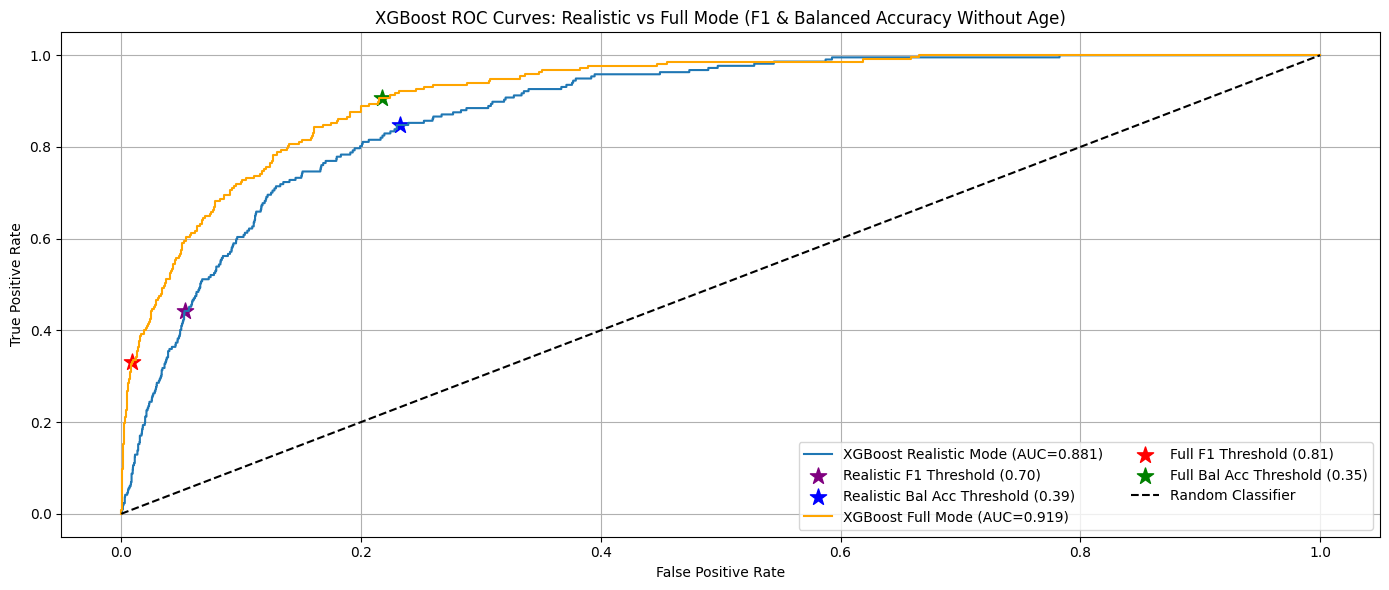

In [19]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


def roc_point(y_true, y_pred_prop, threshold):
    y_pred = (y_pred_prop >= threshold).astype(int)
    try:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    except ValueError:
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = (cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1])

    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return fpr, tpr

# Compute ROC curves for XGBoost models
fpr_real, tpr_real, _ = roc_curve(y_test, y_test_pred_prop_realistic)
fpr_full, tpr_full, _ = roc_curve(y_test, y_test_pred_prop_full)

roc_auc_real = auc(fpr_real, tpr_real)
roc_auc_full = auc(fpr_full, tpr_full)

# Compute points for thresholds for XGBoost models
fpr_f1_real, tpr_f1_real = roc_point(y_test, y_test_pred_prop_realistic, xgb_realistic_model['thresholds']['F1'])
fpr_bal_real, tpr_bal_real = roc_point(y_test, y_test_pred_prop_realistic, xgb_realistic_model['thresholds']['Balanced_Accuracy'])

fpr_f1_full, tpr_f1_full = roc_point(y_test, y_test_pred_prop_full, xgb_full_model['thresholds']['F1'])
fpr_bal_full, tpr_bal_full = roc_point(y_test, y_test_pred_prop_full, xgb_full_model['thresholds']['Balanced_Accuracy'])

# Plot combined ROC
plt.figure(figsize=(14, 6))

# XGBoost Realistic Mode
plt.plot(fpr_real, tpr_real, label=f'XGBoost Realistic Mode (AUC={roc_auc_real:.3f})', linestyle='-')
plt.scatter(fpr_f1_real, tpr_f1_real, color='purple', marker='*', s=150,
            label=f'Realistic F1 Threshold ({xgb_realistic_model["thresholds"]["F1"]:.2f})')
plt.scatter(fpr_bal_real, tpr_bal_real, color='blue', marker='*', s=150,
            label=f'Realistic Bal Acc Threshold ({xgb_realistic_model["thresholds"]["Balanced_Accuracy"]:.2f})')

# XGBoost Full Mode
plt.plot(fpr_full, tpr_full, label=f'XGBoost Full Mode (AUC={roc_auc_full:.3f})', color='orange', linestyle='-')
plt.scatter(fpr_f1_full, tpr_f1_full, color='red', marker='*', s=150,
            label=f'Full F1 Threshold ({xgb_full_model["thresholds"]["F1"]:.2f})')
plt.scatter(fpr_bal_full, tpr_bal_full, color='green', marker='*', s=150,
            label=f'Full Bal Acc Threshold ({xgb_full_model["thresholds"]["Balanced_Accuracy"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curves: Realistic vs Full Mode (F1 & Balanced Accuracy Without Age)")
plt.legend(ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_roc_combined.png", dpi=300)
plt.show()

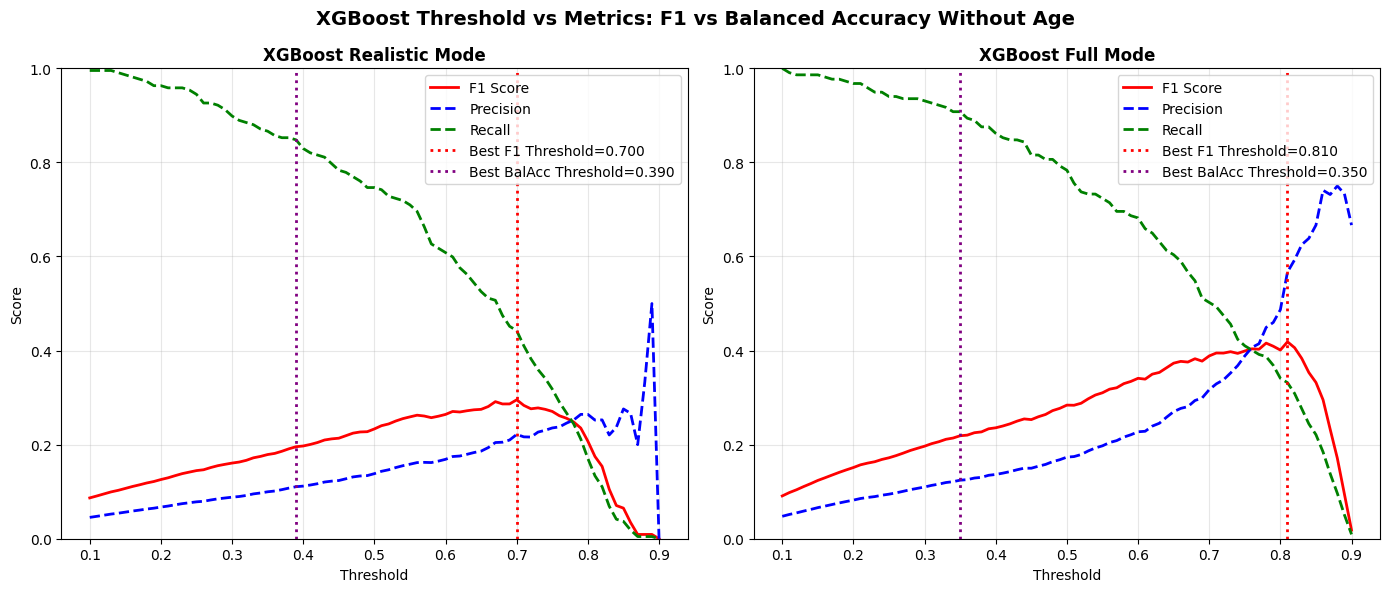

In [20]:
from sklearn.metrics import f1_score, balanced_accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Define threshold range
threshold_range = np.arange(0.1, 0.91, 0.01)

def compute_metrics(y_true, y_pred_prop, threshold_range):
    f1_scores, bal_acc_scores, precision_scores, recall_scores = [], [], [], []
    for t in threshold_range:
        y_pred_t = (y_pred_prop >= t).astype(int)
        f1_scores.append(f1_score(y_true, y_pred_t, zero_division=0))
        bal_acc_scores.append(balanced_accuracy_score(y_true, y_pred_t))
        precision_scores.append(precision_score(y_true, y_pred_t, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred_t, zero_division=0))
    return f1_scores, bal_acc_scores, precision_scores, recall_scores


# Realistic Mode (Using XGBoost predictions)
f1_scores_real, bal_acc_scores_real, precision_scores_real, recall_scores_real = compute_metrics(
    y_test, y_test_pred_prop_realistic, threshold_range
)

# Full Mode (Using XGBoost predictions)
f1_scores_full, bal_acc_scores_full, precision_scores_full, recall_scores_full = compute_metrics(
    y_test, y_test_pred_prop_full, threshold_range
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('XGBoost Threshold vs Metrics: F1 vs Balanced Accuracy Without Age', fontsize=14, fontweight='bold')

# XGBoost Realistic Mode
axes[0].plot(threshold_range, f1_scores_real, 'r-', linewidth=2, label='F1 Score')
axes[0].plot(threshold_range, precision_scores_real, 'b--', linewidth=2, label='Precision')
axes[0].plot(threshold_range, recall_scores_real, 'g--', linewidth=2, label='Recall')
axes[0].axvline(xgb_realistic_model['thresholds']['F1'], color='red', linestyle=':', linewidth=2,
                 label=f'Best F1 Threshold={xgb_realistic_model["thresholds"]["F1"]:.3f}')
axes[0].axvline(xgb_realistic_model['thresholds']['Balanced_Accuracy'], color='purple', linestyle=':', linewidth=2,
                 label=f'Best BalAcc Threshold={xgb_realistic_model["thresholds"]["Balanced_Accuracy"]:.3f}')
axes[0].set_title('XGBoost Realistic Mode', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Score')
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='best')
axes[0].set_ylim([0, 1])

# XGBoost Full Mode
axes[1].plot(threshold_range, f1_scores_full, 'r-', linewidth=2, label='F1 Score')
axes[1].plot(threshold_range, precision_scores_full, 'b--', linewidth=2, label='Precision')
axes[1].plot(threshold_range, recall_scores_full, 'g--', linewidth=2, label='Recall')
axes[1].axvline(xgb_full_model['thresholds']['F1'], color='red', linestyle=':', linewidth=2,
                 label=f'Best F1 Threshold={xgb_full_model["thresholds"]["F1"]:.3f}')
axes[1].axvline(xgb_full_model['thresholds']['Balanced_Accuracy'], color='purple', linestyle=':', linewidth=2,
                 label=f'Best BalAcc Threshold={xgb_full_model["thresholds"]["Balanced_Accuracy"]:.3f}')
axes[1].set_title('XGBoost Full Mode', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Score')
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='best')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig("xgboost_threshold_vs_metrics_pair_combined.png", dpi=300, bbox_inches='tight')
plt.show()